In [ ]:
# Code to calculate peak area ratios between polymer(peak n):polymer(peak ref) and gr+polymer(peak n):gr+polymer(peak ref)
# via Gaussian fits of IRRAS data. Plots both ratios over fitted peak center frequency. Generates a new plot for each new
# reference peak

# EVA
%matplotlib inline

import matplotlib.pyplot as plt; import numpy as np; import pandas as pd; from scipy.optimize import curve_fit
from scipy.signal import find_peaks; import matplotlib.lines as mlines; plt.rcParams.update({'font.size': 18});
import matplotlib.transforms as transforms; import string

def gaussS(x,a,x0,sigma):
    y=a*np.exp(-(x-x0)**2/(2*sigma**2));
    return y
def gaussM(x,*params):
    y=np.zeros_like(x); params=np.array(params);
    for i in range(0,params[0,:].size,1):
        a=params[0,i]; x0=params[1,i]; sigma=params[2,i];
        y=y+a*np.exp(-(x-x0)**2/(2*sigma**2));
    return y
def gaussArea(a,sigma):
    return a*sigma*np.pi**(0.5)

# Initialize dictionaries for analysis, enter solvents. Find and fit peaks to get peak area data, load into dictionaries
masterParams={}; fPolyParams={}; fPolyArea={}; fGrParams={}; fGrArea={};
solvents=['trichlorobenzene','toluene','acetone'];

for counter,name in enumerate(solvents):
    path='C:\\Users\\acarr\\Documents\\Data\\IRRAS\\Corrected Data\\';
    irPoly=np.genfromtxt(path+'EVA_'+name+'_fixed.csv',delimiter=',');
    irGr=np.genfromtxt(path+'Gr_EVA_'+name+'_fixed.csv',delimiter=',');
    # Normalize data to pre-detemrined peak, consider frequency range of interest
    idx=np.where(irPoly[:,0]<1460)[0][-1]; c1=irGr[idx,1]/irPoly[idx,1]; idx2=np.where(irPoly[:,0]<1850)[0][-1];

    #plt.figure(figsize=(10,10)); plt.title('Normalized data for EVA/'+name);
    #plt.plot(irPoly[:,0],c1*irPoly[:,1],label='Polymer'); plt.plot(irGr[:,0],irGr[:,1],label='Gr/Polymer'); plt.legend();
    #plt.xlabel(r'Wavenumbers $(cm^{-1})$'); plt.ylabel('Intensity (au)');

    #plt.figure(); plt.title('Selected peaks for EVA/'+name);
    x=irPoly[:idx2,0]; y=c1*irPoly[:idx2,1];
    idx3=find_peaks(y,height=0.01,distance=30);
    #plt.plot(x,y); plt.scatter(x[idx3[0][:]],y[idx3[0][:]]); 
    #plt.xlabel(r'Wavenumbers $(cm^{-1})$'); plt.ylabel('Intensity (au)');

    amp=y[idx3[0][:]]; cen=x[idx3[0][:]]; sig=np.zeros_like(idx3[0][:])+10;
    initParams=np.vstack((amp,cen,sig));

    #plt.figure(figsize=(10,10));
    for n in range(0,initParams.shape[1]):
        p=initParams[:,n]; center=p[1]; span=30;
        spanIdx1=np.argmax(np.where(x<center-span)); spanIdx2=np.argmax(np.where(x<center+span));
        xPeak=x[spanIdx1:spanIdx2]; yPeak=y[spanIdx1:spanIdx2];
        params,cov=curve_fit(gaussS,xPeak,yPeak,p0=p);
        s1='Raw Data '+str(n); s2='Fitted Data '+str(n); col='C'+str(n); sz=4;
        #plt.plot(xPeak,yPeak,color=col,marker='o',ms=sz,ls='',label=s1); 
        #plt.plot(xPeak,gaussS(xPeak,*params),color=col,label=s2); 
        #plt.legend(); 
        masterParams[n,name]=params[1]; fPolyArea[n,name]=gaussArea(params[0],params[2]);
    #plt.title('Fitted peaks for EVA/'+name); plt.xlabel(r'Wavenumbers $(cm^{-1})$'); plt.ylabel('Intensity (au)');

    #plt.figure(); plt.xlabel(r'Wavenumbers $(cm^{-1})$'); plt.ylabel('Intensity (au)');
    idx2=np.where(irGr[:,0]<1850)[0][-1];
    x=irGr[:idx2,0]; y=irGr[:idx2,1];
    idx3=find_peaks(y,height=0.01,distance=30);
    #plt.plot(x,y); plt.scatter(x[idx3[0][:]],y[idx3[0][:]]); plt.title('Selected peaks for Gr/EVA/'+name);
    amp=y[idx3[0][:]]; cen=x[idx3[0][:]]; sig=np.zeros_like(idx3[0][:])+10;
    initParams=np.vstack((amp,cen,sig));

    #plt.figure(figsize=(10,10));
    for n in range(0,initParams.shape[1]):
        p=initParams[:,n]; center=p[1]; span=30;
        spanIdx1=np.argmax(np.where(x<center-span)); spanIdx2=np.argmax(np.where(x<center+span));
        xPeak=x[spanIdx1:spanIdx2]; yPeak=y[spanIdx1:spanIdx2];
        params,cov=curve_fit(gaussS,xPeak,yPeak,p0=p);
        s1='Raw Data '+str(n); s2='Fitted Data '+str(n); col='C'+str(n); sz=4;
        #plt.plot(xPeak,yPeak,color=col,marker='o',ms=sz,ls='',label=s1); 
        #plt.plot(xPeak,gaussS(xPeak,*params),color=col,label=s2); 
        #plt.legend(); 
        fGrArea[n,name]=gaussArea(params[0],params[2]);
    #plt.title('Fitted peaks for Gr/EVA/'+name); plt.xlabel(r'Wavenumbers $(cm^{-1})$'); plt.ylabel('Intensity (au)');

# Generate figure with subplots. 
_=plt.figure(figsize=(25,20));
ax1=plt.subplot2grid((3,6),(0,0),colspan=6,rowspan=1); ax2=plt.subplot2grid((3,6),(1,0),colspan=2,rowspan=1); 
ax3=plt.subplot2grid((3,6),(1,2),colspan=2,rowspan=1);ax4=plt.subplot2grid((3,6),(1,4),colspan=2,rowspan=1); 
ax5=plt.subplot2grid((3,6),(2,1),colspan=4,rowspan=1);
plt.subplots_adjust(wspace=0.55,hspace=0.35,top=0.95);

# Make mini subplots for peak cartoons. Get original subplot positions and make new axes
pos=ax2.get_position();
boxH=0.16*pos.height; boxW=pos.width; ax2a=plt.axes([pos.x0,pos.y0+1.02*pos.height,boxW,boxH]);
boxH=0.4*pos.height; boxW=0.52*pos.width; ax2b=plt.axes([pos.x0+0.37*pos.width,pos.y0+0.5*pos.height,boxW,boxH]);
pos=ax3.get_position();
boxH=0.16*pos.height; boxW=pos.width; ax3a=plt.axes([pos.x0,pos.y0+1.02*pos.height,boxW,boxH]);
boxH=0.4*pos.height; boxW=0.52*pos.width; ax3b=plt.axes([pos.x0+0.37*pos.width,pos.y0+0.5*pos.height,boxW,boxH]);
pos=ax4.get_position();
boxH=0.16*pos.height; boxW=pos.width; ax4a=plt.axes([pos.x0,pos.y0+1.02*pos.height,boxW,boxH]);
boxH=0.4*pos.height; boxW=0.52*pos.width; ax4b=plt.axes([pos.x0+0.37*pos.width,pos.y0+0.5*pos.height,boxW,boxH]);
pos=ax5.get_position();
boxH=0.16*pos.height; boxW=pos.width; ax5a=plt.axes([pos.x0,pos.y0+1.02*pos.height,boxW,boxH]);
boxH=0.4*pos.height; boxW=0.40*pos.width; ax5b=plt.axes([pos.x0+0.45*pos.width,pos.y0+0.5*pos.height,boxW,boxH]);

# Plot shaded peak cartoons on mini subplots 
rang=75; axs=[ax2a,ax3a,ax4a,ax5a]; xaxis=np.arange(925,1900,75); a=0.4;
for ax in axs:
    cen=masterParams[2,'acetone']; xrange=np.linspace(cen-rang,cen+rang,1e3); 
    _=ax.plot(xrange,gaussS(xrange,1,cen,15),c='C1'); _=ax.fill(xrange,gaussS(xrange,1,cen,15),c='C1',alpha=a);
    cen=masterParams[3,'acetone']; xrange=np.linspace(cen-rang,cen+rang,1e3); 
    _=ax.plot(xrange,gaussS(xrange,1,cen,15),c='C4'); _=ax.fill(xrange,gaussS(xrange,1,cen,15),c='C4',alpha=a);
    cen=masterParams[6,'acetone']; xrange=np.linspace(cen-rang,cen+rang,1e3); 
    _=ax.plot(xrange,gaussS(xrange,1,cen,15),c='C7'); _=ax.fill(xrange,gaussS(xrange,1,cen,15),c='C7',alpha=a);
    _=ax.set_xlim(xaxis[0],xaxis[-1]); ax.axis('off');
amp=0.43; sig=0.08; rang=0.45; axs=[ax2b,ax3b,ax4b]; 
for ax in axs:
    cen=0.5; xrange=np.linspace(cen-rang,cen+rang,1e2); 
    ax.plot(xrange,gaussS(xrange,amp,cen,sig)+0.5,c='C1'); ax.fill(xrange,gaussS(xrange,amp,cen,sig)+0.5,c='C1',alpha=a);
    cen=1.5; xrange=np.linspace(cen-rang,cen+rang,1e2); 
    ax.plot(xrange,gaussS(xrange,amp,cen,sig)+0.5,c='C4'); ax.fill(xrange,gaussS(xrange,amp,cen,sig)+0.5,c='C4',alpha=a);
    cen=2.5; xrange=np.linspace(cen-rang,cen+rang,1e2);
    ax.plot(xrange,gaussS(xrange,amp,cen,sig)+0.5,c='C7'); ax.fill(xrange,gaussS(xrange,amp,cen,sig)+0.5,c='C7',alpha=a);
    ax.axhline(0.45,c='k'); ax.axis('off');
cen=1.5; xrange=np.linspace(cen-rang,cen+rang,1e2);
ax2b.plot(xrange,gaussS(xrange,amp,cen,sig),c='C1'); ax2b.fill(xrange,gaussS(xrange,amp,cen,sig),c='C1',alpha=a);
ax3b.plot(xrange,gaussS(xrange,amp,cen,sig),c='C4'); ax3b.fill(xrange,gaussS(xrange,amp,cen,sig),c='C4',alpha=a);
ax4b.plot(xrange,gaussS(xrange,amp,cen,sig),c='C7'); ax4b.fill(xrange,gaussS(xrange,amp,cen,sig),c='C7',alpha=a);

cen=0.5; xrange=np.linspace(cen-rang,cen+rang,1e2); 
ax5b.plot(xrange,gaussS(xrange,amp,cen,sig),c='C1',ls='--',lw=4);
ax5b.plot(xrange,gaussS(xrange,amp,cen,sig)+0.5,c='C1',lw=4); 
ax5b.fill(xrange,gaussS(xrange,amp,cen,sig),c='C1',alpha=a);
ax5b.fill(xrange,gaussS(xrange,amp,cen,sig)+0.5,c='C1',alpha=a);
cen=1.5; xrange=np.linspace(cen-rang,cen+rang,1e2); 
ax5b.plot(xrange,gaussS(xrange,amp,cen,sig),c='C4',ls='--',lw=4);
ax5b.plot(xrange,gaussS(xrange,amp,cen,sig)+0.5,c='C4',lw=4); 
ax5b.fill(xrange,gaussS(xrange,amp,cen,sig),c='C4',alpha=a);
ax5b.fill(xrange,gaussS(xrange,amp,cen,sig)+0.5,c='C4',alpha=a);
cen=2.5; xrange=np.linspace(cen-rang,cen+rang,1e2);
ax5b.plot(xrange,gaussS(xrange,amp,cen,sig),c='C7',ls='--',lw=4);
ax5b.plot(xrange,gaussS(xrange,amp,cen,sig)+0.5,c='C7',lw=4); 
ax5b.fill(xrange,gaussS(xrange,amp,cen,sig),c='C7',alpha=a);
ax5b.fill(xrange,gaussS(xrange,amp,cen,sig)+0.5,c='C7',alpha=a);
ax5b.axhline(0.45,c='k'); ax5b.axis('off');

# Plot normalized polymer and gr+polymer IR data. Create legend and correct axes labels
space=0.3; col=['C3','C0','C2']; shapes=['o','^','s']; solvents=['trichlorobenzene','acetone','toluene']
for n,name in enumerate(solvents):
    irPoly=np.genfromtxt(path+'EVA_'+name+'_fixed.csv',delimiter=',');
    irGr=np.genfromtxt(path+'Gr_EVA_'+name+'_fixed.csv',delimiter=',');
    idx=np.where(irPoly[:,0]<1460)[0][-1]; c1=irGr[idx,1]/irPoly[idx,1]; idx2=np.where(irPoly[:,0]<1850)[0][-1]; 
    _=ax1.plot(irPoly[:idx2,0],c1*irPoly[:idx2,1]+n*space,color=col[n]); 
    _=ax1.plot(irGr[:idx2,0],irGr[:idx2,1]+n*space,color=col[n],ls='--');
ax1.axvspan(1070,1155,fc='C1',alpha=a);ax1.axvspan(1175,1325,fc='C4',alpha=a);ax1.axvspan(1675,1775,fc='C7',alpha=a);   
trichloro=mlines.Line2D([],[],color='C3',linestyle='-',label='EVA/Trichlorobenzene, $\chi$ = 1.990');
acetone=mlines.Line2D([],[],color='C0',linestyle='-',label='EVA/Acetone, $\chi$ = 1.743');
tol=mlines.Line2D([],[],color='C2',linestyle='-',label='EVA/Toluene, $\chi$ = 0.3938'); 
gr=mlines.Line2D([],[],linestyle='--',color='black',label='with graphene');
poly=mlines.Line2D([],[],linestyle='-',color='black',label='without graphene');
s1=r'$P_{ref}$ = C-O '; s1+='\nStretching'; s2=r'$P_{ref}$ = C=O '; s2+='\nStretching';
ax1.text(1112.5,1.52,s1,ha='center',va='center',transform=ax1.transData,fontsize=20);
ax1.text(1250,1.52,s1,ha='center',va='center',transform=ax1.transData,fontsize=20);
ax1.text(1725,1.52,s2,ha='center',va='center',transform=ax1.transData,fontsize=20);
ax1.set_xlabel(r'Frequency $(cm^{-1})$'); ax1.set_ylabel('Intensity (a.u.)'); 
ax1.set_ylim([-0.05,1.7]); _=ax1.set_xticks(xaxis); ax1.set_xlim(xaxis[0],xaxis[-1]);
ax1.legend(handles=[tol,acetone,trichloro,gr,poly],loc='upper right',bbox_to_anchor=(0.78,1)); 

axs=[ax2,ax3,ax4,ax5];
_=[ax.axhline(1,color='k',linewidth=1.5) for ax in axs];

# Initialize area ratio arrays. Choose ref peak and plot peak area ratios to ref using correct colors and shapes. Repeat
# for other ref peaks of interest. Load peak area data w and wo gr into lists for later use
sz=13; areaRatioTri=[]; areaRatioTol=[]; areaRatioAce=[]; freqTri=[]; freqTol=[]; freqAce=[];
axs=[ax2,ax3,ax4]; refPeak=[2,3,6]; numPeaks=3; col=['C1','C4','C7']; counter=0;
for p in refPeak:
    for q in refPeak:
    # For each peak, drawn vertical lines. Draw horizontal line at 1 for reference. Plot area ratio data using correct
    # shape based on solvent. Vary color between peaks. Load area ratio data into array for ratio ratio plot. On first
        # iteration, set x axis ticks and rotate labels
        _=axs[counter].axvline(masterParams[q,'acetone'],color='k',lw=1.5);
        sol='trichlorobenzene';  
        _=axs[counter].plot(masterParams[q,sol],fPolyArea[q,sol]/fPolyArea[p,sol],ls='',marker='o',fillstyle='none',
                            c='C3',markersize=sz);
        _=axs[counter].plot(masterParams[q,sol],fGrArea[q,sol]/fGrArea[p,sol],ls='',marker='o',fillstyle='full',
                            c='C3', markersize=sz);
        areaRatioTri.append(fPolyArea[q,sol]/fGrArea[q,sol]); freqTri.append(masterParams[q,sol]);
        sol='toluene';
        _=axs[counter].plot(masterParams[q,sol],fPolyArea[q,sol]/fPolyArea[p,sol],ls='',marker='^',fillstyle='none',
                            c='C2',markersize=sz);
        _=axs[counter].plot(masterParams[q,sol],fGrArea[q,sol]/fGrArea[p,sol],ls='',marker='^',fillstyle='full',
                            c='C2',markersize=sz);
        areaRatioTol.append(fPolyArea[q,sol]/fGrArea[q,sol]); freqTol.append(masterParams[q,sol]);
        sol='acetone';
        _=axs[counter].plot(masterParams[q,sol],fPolyArea[q,sol]/fPolyArea[p,sol],ls='',marker='s',fillstyle='none',
                            c='C0',markersize=sz);
        _=axs[counter].plot(masterParams[q,sol],fGrArea[q,sol]/fGrArea[p,sol],ls='',marker='s',fillstyle='full',
                            c='C0',markersize=sz);
        areaRatioAce.append(fPolyArea[q,sol]/fGrArea[q,sol]); freqAce.append(masterParams[q,sol]);
    counter+=1;
# Set x ticks, set axes labels, set titles
bInfoL=['C-O\nStretching','C=O\nStretching']; 
for ax in axs:
    _=ax.set_xticks(xaxis); _=ax.set_xticklabels(xaxis,rotation=45,ha='right'); _=ax.set_xlim(xaxis[0],xaxis[-1]);
    _=ax.set_ylabel('Peak Area/\nReference Peak Area',fontsize=20,multialignment='center'); 
    _=ax.set_xlabel(r'Frequency $(cm^{-1})$');_=ax.set_ylim([0,12]);
    _=ax.annotate(bInfoL[0],xy=(1095,7),xycoords='data',xytext=(1053,3),textcoords='data',ha='center',
                  arrowprops=dict(arrowstyle='simple',fc='k',relpos=(0.5,1),connectionstyle="arc3"));
    _=ax.annotate('',xy=(1220,7),xycoords='data',xytext=(1050,4.3),textcoords='data',ha='center',
                  arrowprops=dict(arrowstyle='simple',fc='k',connectionstyle="arc3"));
    _=ax.annotate(bInfoL[1],xy=(1725,7),xycoords='data',xytext=(1550,3),textcoords='data',ha='center',
                  arrowprops=dict(arrowstyle='simple',fc='k',relpos=(0.5,0),connectionstyle="arc3"));

# For each subplot, label each vertical line with the correct bonding information. Make arrow to point to peak line,
# add legend
f=mlines.Line2D([],[],marker='s',linestyle='',ms=sz,color='black',label='with graphene');
o=mlines.Line2D([],[],marker='s',linestyle='',ms=sz,color='black',markerfacecolor='white',label='without graphene');
ax3.legend(handles=[f,o],loc='upper left');

# Convert previously used ratio lists into arrays
areaRatioTri=np.asarray(areaRatioTri); areaRatioTol=np.asarray(areaRatioTol); areaRatioAce=np.asarray(areaRatioAce);
freqTri=np.asarray(freqTri); freqTol=np.asarray(freqTol); freqAce=np.asarray(freqAce);
# Plot peak area ratio ratios data with correct color and marker info
sz=15; _=[ax5.axvline(x,color='k',linewidth=0.8) for x in freqAce[:3]];
_=ax5.plot(freqTri[:numPeaks],areaRatioTri[:numPeaks],color='C3',marker='o',ms=sz,ls='',label='EVA/Trichlorobenzene');
_=ax5.plot(freqTol[:numPeaks],areaRatioTol[:numPeaks],color='C2',marker='^',ms=sz,ls='',label='EVA/Toluene');
_=ax5.plot(freqAce[:numPeaks],areaRatioAce[:numPeaks],color='C0',marker='s',ms=sz,ls='',label='EVA/Acetone');

# Draw peak vertical lines and horizontal line at 1. Label peak lines with bonding info. Set axes labels
_=[ax5.axvline(x,color='k',linewidth=1.5) for x in freqAce[:numPeaks]]; _=ax5.axhline(1,color='k',lw=1.5);
_=ax5.annotate(bInfoL[0],xy=(1110,10),xycoords='data',xytext=(1175,5),textcoords='data',ha='center',va='center',arrowprops=dict(arrowstyle='simple',fc='k',relpos=(0.57,1),connectionstyle="arc3"));
_=ax5.annotate('',xy=(1240,10),xycoords='data',xytext=(1175,6.25),textcoords='data',ha='center',va='center',arrowprops=dict(arrowstyle='simple',fc='k',relpos=(0.5,1),connectionstyle="arc3"));
_=ax5.annotate(bInfoL[1],xy=(1730,8),xycoords='data',xytext=(1650,2.5),textcoords='data',ha='center',va='center',arrowprops=dict(arrowstyle='simple',fc='k',relpos=(0.5,1),connectionstyle="arc3"));
_=ax5.set_ylabel('Fractional Bond Shift \nFrom Graphene',fontsize=20,multialignment='center');
_=ax5.set_xlabel(r'Frequency $(cm^{-1})$');_=ax5.set_xticks(xaxis);_=ax5.set_xticklabels(xaxis,rotation=45,ha='right');

# Add subplot letter labels and fig title
axs=[ax1,ax2,ax3,ax4,ax5];
for n,ax in enumerate(axs):
    ax.text(0.95,0.92,string.ascii_uppercase[n],transform=ax.transAxes,size=22,weight='bold');
plt.savefig('C:\\Users\\acarr\\Documents\\Figures\\IRRAS Paper Figures\\IRRAS_EVA.eps',format='eps');

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

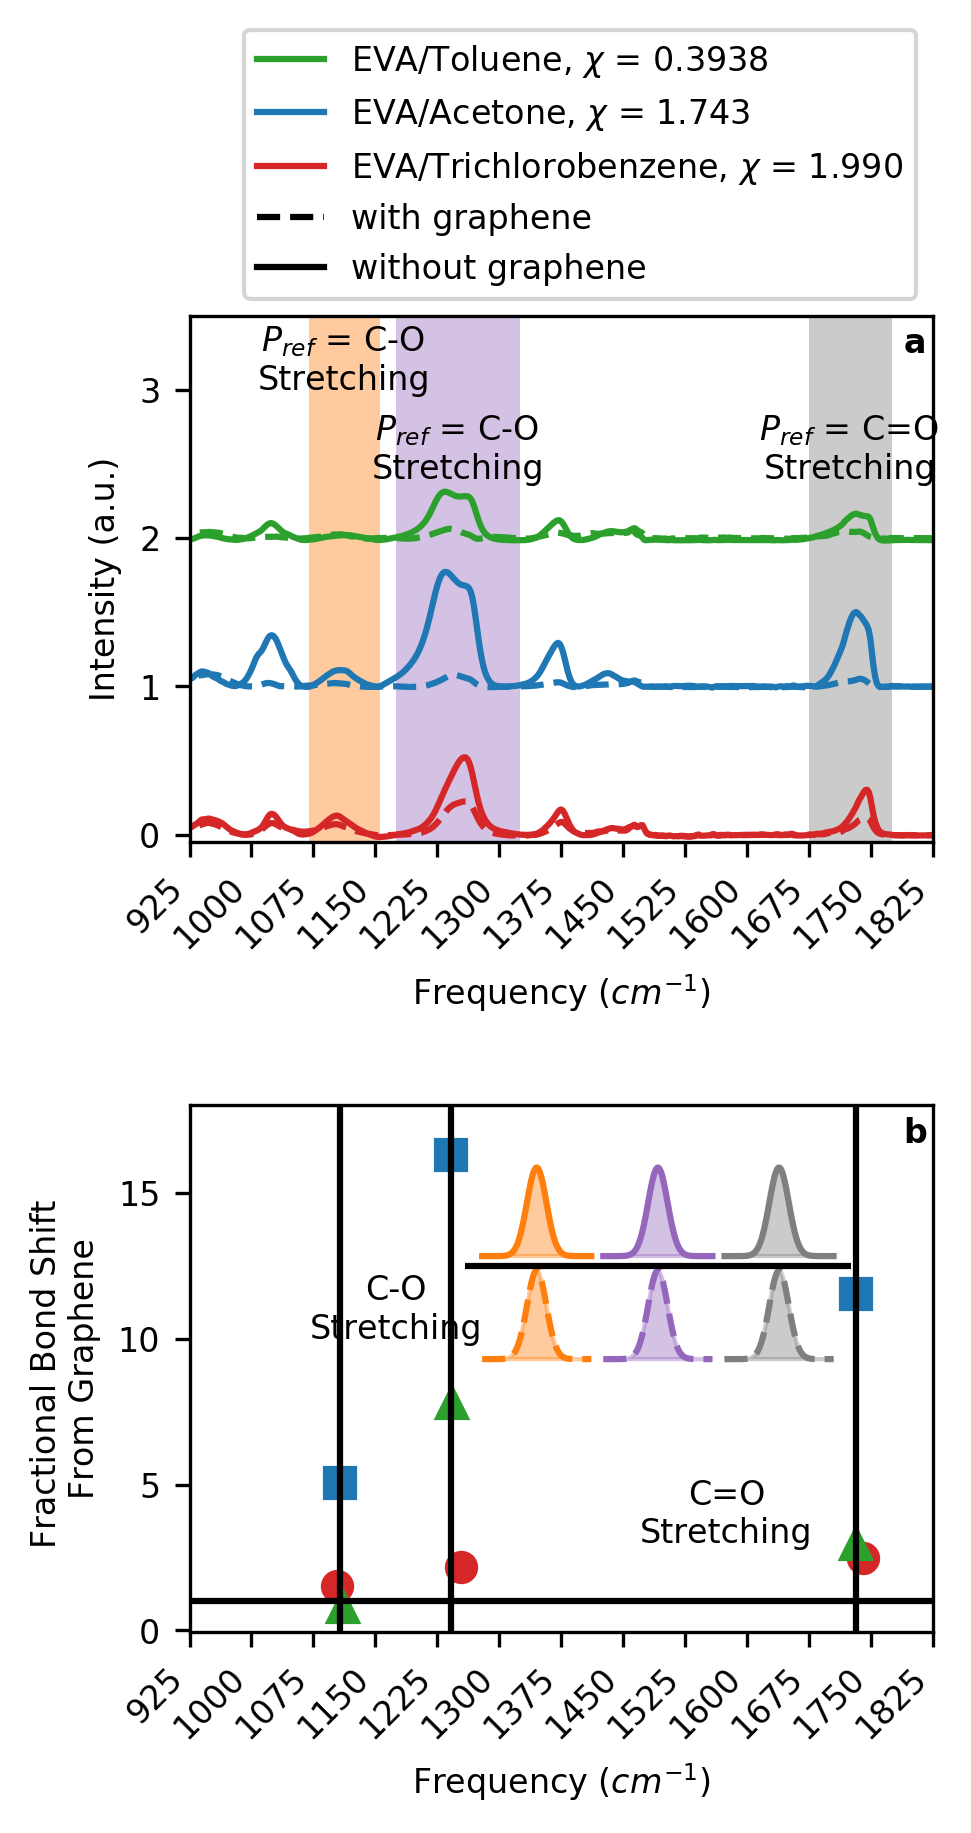

In [36]:
# Code to calculate peak area ratios between polymer(peak n):polymer(peak ref) and gr+polymer(peak n):gr+polymer(peak ref)
# via Gaussian fits of IRRAS data. Plot only gr+polymer(peak n):gr+polymer(peak ref) over fitted peak center frequency. 

# EVA
%matplotlib inline

import matplotlib.pyplot as plt; import numpy as np; import pandas as pd; from scipy.optimize import curve_fit
from scipy.signal import find_peaks; import matplotlib.lines as mlines; plt.rcParams.update({'font.size': 8});
import matplotlib.transforms as transforms; import string;

def gaussS(x,a,x0,sigma):
    y=a*np.exp(-(x-x0)**2/(2*sigma**2));
    return y
def gaussM(x,*params):
    y=np.zeros_like(x); params=np.array(params);
    for i in range(0,params[0,:].size,1):
        a=params[0,i]; x0=params[1,i]; sigma=params[2,i];
        y=y+a*np.exp(-(x-x0)**2/(2*sigma**2));
    return y
def gaussArea(a,sigma):
    return a*sigma*np.pi**(0.5)

# Initialize dictionaries for analysis, enter solvents. Find and fit peaks to get peak area data, load into dictionaries
masterParams={}; fPolyParams={}; fPolyArea={}; fGrParams={}; fGrArea={};
solvents=['trichlorobenzene','toluene','acetone'];

for counter,name in enumerate(solvents):
    path='C:\\Users\\acarr\\Documents\\Data\\IRRAS\\Corrected Data\\';
    irPoly=np.genfromtxt(path+'EVA_'+name+'_fixed.csv',delimiter=',');
    irGr=np.genfromtxt(path+'Gr_EVA_'+name+'_fixed.csv',delimiter=',');
    # Normalize data to pre-detemrined peak, consider frequency range of interest
    idx=np.where(irPoly[:,0]<1460)[0][-1]; c1=irGr[idx,1]/irPoly[idx,1]; idx2=np.where(irPoly[:,0]<1850)[0][-1];

    #plt.figure(figsize=(10,10)); plt.title('Normalized data for EVA/'+name);
    #plt.plot(irPoly[:,0],c1*irPoly[:,1],label='Polymer'); plt.plot(irGr[:,0],irGr[:,1],label='Gr/Polymer'); plt.legend();
    #plt.xlabel(r'Wavenumbers $(cm^{-1})$'); plt.ylabel('Intensity (au)');

    #plt.figure(); plt.title('Selected peaks for EVA/'+name);
    x=irPoly[:idx2,0]; y=c1*irPoly[:idx2,1];
    idx3=find_peaks(y,height=0.01,distance=30);
    #plt.plot(x,y); plt.scatter(x[idx3[0][:]],y[idx3[0][:]]); 
    #plt.xlabel(r'Wavenumbers $(cm^{-1})$'); plt.ylabel('Intensity (au)');

    amp=y[idx3[0][:]]; cen=x[idx3[0][:]]; sig=np.zeros_like(idx3[0][:])+10;
    initParams=np.vstack((amp,cen,sig));

    #plt.figure(figsize=(10,10));
    for n in range(0,initParams.shape[1]):
        p=initParams[:,n]; center=p[1]; span=30;
        spanIdx1=np.argmax(np.where(x<center-span)); spanIdx2=np.argmax(np.where(x<center+span));
        xPeak=x[spanIdx1:spanIdx2]; yPeak=y[spanIdx1:spanIdx2];
        params,cov=curve_fit(gaussS,xPeak,yPeak,p0=p);
        s1='Raw Data '+str(n); s2='Fitted Data '+str(n); col='C'+str(n); sz=4;
        #plt.plot(xPeak,yPeak,color=col,marker='o',ms=sz,ls='',label=s1); 
        #plt.plot(xPeak,gaussS(xPeak,*params),color=col,label=s2); 
        #plt.legend(); 
        masterParams[n,name]=params[1]; fPolyArea[n,name]=gaussArea(params[0],params[2]);
    #plt.title('Fitted peaks for EVA/'+name); plt.xlabel(r'Wavenumbers $(cm^{-1})$'); plt.ylabel('Intensity (au)');

    #plt.figure(); plt.xlabel(r'Wavenumbers $(cm^{-1})$'); plt.ylabel('Intensity (au)');
    idx2=np.where(irGr[:,0]<1850)[0][-1];
    x=irGr[:idx2,0]; y=irGr[:idx2,1];
    idx3=find_peaks(y,height=0.01,distance=30);
    #plt.plot(x,y); plt.scatter(x[idx3[0][:]],y[idx3[0][:]]); plt.title('Selected peaks for Gr/EVA/'+name);
    amp=y[idx3[0][:]]; cen=x[idx3[0][:]]; sig=np.zeros_like(idx3[0][:])+10;
    initParams=np.vstack((amp,cen,sig));

    #plt.figure(figsize=(10,10));
    for n in range(0,initParams.shape[1]):
        p=initParams[:,n]; center=p[1]; span=30;
        spanIdx1=np.argmax(np.where(x<center-span)); spanIdx2=np.argmax(np.where(x<center+span));
        xPeak=x[spanIdx1:spanIdx2]; yPeak=y[spanIdx1:spanIdx2];
        params,cov=curve_fit(gaussS,xPeak,yPeak,p0=p);
        s1='Raw Data '+str(n); s2='Fitted Data '+str(n); col='C'+str(n); sz=4;
        #plt.plot(xPeak,yPeak,color=col,marker='o',ms=sz,ls='',label=s1); 
        #plt.plot(xPeak,gaussS(xPeak,*params),color=col,label=s2); 
        #plt.legend(); 
        fGrArea[n,name]=gaussArea(params[0],params[2]);
    #plt.title('Fitted peaks for Gr/EVA/'+name); plt.xlabel(r'Wavenumbers $(cm^{-1})$'); plt.ylabel('Intensity (au)');

# Generate figure with subplots. 
#_=plt.figure(figsize=(5.5,7.5),dpi=300);
plt.figure(figsize=(3.54,6.5),dpi=300);
ax1=plt.subplot2grid((2,1),(0,0),colspan=1,rowspan=1); ax2=plt.subplot2grid((2,1),(1,0),colspan=1,rowspan=1); 
plt.subplots_adjust(hspace=0.5,top=0.8,left=0.2);

# Make mini subplots for peak cartoons. Get original subplot positions and make new axes
pos=ax2.get_position(); linewidth=1.5; fs=8;
boxH=0.4*pos.height; boxW=0.52*pos.width; ax2b=plt.axes([pos.x0+0.37*pos.width,pos.y0+0.5*pos.height,boxW,boxH]);

# Plot shaded peak cartoons on mini subplots 
a=0.4; amp=0.43; sig=0.08; rang=0.45;  
cen=0.5; xrange=np.linspace(cen-rang,cen+rang,1e2); 
ax2b.plot(xrange,gaussS(xrange,amp,cen,sig),c='C1',ls='--',lw=linewidth);
ax2b.plot(xrange,gaussS(xrange,amp,cen,sig)+0.5,c='C1',lw=linewidth); 
ax2b.fill(xrange,gaussS(xrange,amp,cen,sig),c='C1',alpha=a);
ax2b.fill(xrange,gaussS(xrange,amp,cen,sig)+0.5,c='C1',alpha=a);
cen=1.5; xrange=np.linspace(cen-rang,cen+rang,1e2); 
ax2b.plot(xrange,gaussS(xrange,amp,cen,sig),c='C4',ls='--',lw=linewidth);
ax2b.plot(xrange,gaussS(xrange,amp,cen,sig)+0.5,c='C4',lw=linewidth); 
ax2b.fill(xrange,gaussS(xrange,amp,cen,sig),c='C4',alpha=a);
ax2b.fill(xrange,gaussS(xrange,amp,cen,sig)+0.5,c='C4',alpha=a);
cen=2.5; xrange=np.linspace(cen-rang,cen+rang,1e2);
ax2b.plot(xrange,gaussS(xrange,amp,cen,sig),c='C7',ls='--',lw=linewidth);
ax2b.plot(xrange,gaussS(xrange,amp,cen,sig)+0.5,c='C7',lw=linewidth); 
ax2b.fill(xrange,gaussS(xrange,amp,cen,sig),c='C7',alpha=a);
ax2b.fill(xrange,gaussS(xrange,amp,cen,sig)+0.5,c='C7',alpha=a);
ax2b.axhline(0.45,c='k'); ax2b.axis('off');

# Plot normalized polymer and gr+polymer IR data. Create legend and correct axes labels
space=1; col=['C3','C0','C2']; shapes=['o','^','s']; solvents=['trichlorobenzene','acetone','toluene'];
xaxis=np.arange(925,1900,75);
for n,name in enumerate(solvents):
    irPoly=np.genfromtxt(path+'EVA_'+name+'_fixed.csv',delimiter=',');
    irGr=np.genfromtxt(path+'Gr_EVA_'+name+'_fixed.csv',delimiter=',');
    idx=np.where(irPoly[:,0]<1460)[0][-1]; c1=irGr[idx,1]/irPoly[idx,1]; idx2=np.where(irPoly[:,0]<1850)[0][-1]; 
    _=ax1.plot(irPoly[:idx2,0],c1*irPoly[:idx2,1]+n*space,color=col[n],lw=linewidth); 
    _=ax1.plot(irGr[:idx2,0],irGr[:idx2,1]+n*space,color=col[n],ls='--',lw=linewidth);
ax1.axvspan(1070,1155,fc='C1',alpha=a);ax1.axvspan(1175,1325,fc='C4',alpha=a);ax1.axvspan(1675,1775,fc='C7',alpha=a);   

trichloro=mlines.Line2D([],[],color='C3',linestyle='-',label='EVA/Trichlorobenzene, $\chi$ = 1.990');
acetone=mlines.Line2D([],[],color='C0',linestyle='-',label='EVA/Acetone, $\chi$ = 1.743');
tol=mlines.Line2D([],[],color='C2',linestyle='-',label='EVA/Toluene, $\chi$ = 0.3938'); 
gr=mlines.Line2D([],[],linestyle='--',lw=linewidth,color='black',label='with graphene');
poly=mlines.Line2D([],[],linestyle='-',lw=linewidth,color='black',label='without graphene');

s1=r'$P_{ref}$ = C-O '; s1+='\nStretching'; s2=r'$P_{ref}$ = C=O '; s2+='\nStretching';
ax1.text(1112.5,3.2,s1,ha='center',va='center',transform=ax1.transData,fontsize=fs);
ax1.text(1250,2.6,s1,ha='center',va='center',transform=ax1.transData,fontsize=fs);
ax1.text(1725,2.6,s2,ha='center',va='center',transform=ax1.transData,fontsize=fs);
ax1.set_xlabel(r'Frequency $(cm^{-1})$',fontsize=fs); ax1.set_ylabel('Intensity (a.u.)',fontsize=fs); 
ax1.set_ylim([-0.05,3.5]); 
ax1.set_xticks(xaxis); ax1.set_xticklabels(xaxis,rotation=45,ha='right'); ax1.set_xlim(xaxis[0],xaxis[-1]);
ax1.legend(handles=[tol,acetone,trichloro,gr,poly],loc='lower right',bbox_to_anchor=(1,1)); 

# Initialize area ratio arrays. Choose ref peak and peak area data w and wo gr into lists for later use
areaRatioTri=[]; areaRatioTol=[]; areaRatioAce=[]; freqTri=[]; freqTol=[]; freqAce=[];
refPeak=[2,3,6]; numPeaks=len(refPeak);
for p in refPeak:
    for q in refPeak:
        sol='trichlorobenzene'; areaRatioTri.append(fPolyArea[q,sol]/fGrArea[q,sol]); freqTri.append(masterParams[q,sol]);
        sol='toluene'; areaRatioTol.append(fPolyArea[q,sol]/fGrArea[q,sol]); freqTol.append(masterParams[q,sol]);
        sol='acetone'; areaRatioAce.append(fPolyArea[q,sol]/fGrArea[q,sol]); freqAce.append(masterParams[q,sol]);

# Convert previously used ratio lists into arrays
areaRatioTri=np.asarray(areaRatioTri); areaRatioTol=np.asarray(areaRatioTol); areaRatioAce=np.asarray(areaRatioAce);
freqTri=np.asarray(freqTri); freqTol=np.asarray(freqTol); freqAce=np.asarray(freqAce);
# Plot peak area ratio ratios data with correct color and marker info
sz=7; [ax2.axvline(x,color='k',linewidth=0.8) for x in freqAce[:3]];
ax2.plot(freqTri[:numPeaks],areaRatioTri[:numPeaks],color='C3',marker='o',ms=sz,ls='',label='EVA/Trichlorobenzene');
ax2.plot(freqTol[:numPeaks],areaRatioTol[:numPeaks],color='C2',marker='^',ms=sz,ls='',label='EVA/Toluene');
ax2.plot(freqAce[:numPeaks],areaRatioAce[:numPeaks],color='C0',marker='s',ms=sz,ls='',label='EVA/Acetone');

# Draw peak vertical lines and horizontal line at 1. Label peak lines with bonding info. Set axes labels
bInfoL=['C-O\nStretching','C=O\nStretching']; 
[ax2.axvline(x,color='k',linewidth=1.5) for x in freqAce[:numPeaks]]; ax2.axhline(1,color='k',lw=1.5);
ax2.text(1175,11,bInfoL[0],ha='center',va='center'); ax2.text(1575,4,bInfoL[1],ha='center',va='center');
ax2.set_ylabel('Fractional Bond Shift \nFrom Graphene',fontsize=fs,multialignment='center'); ax2.set_ylim([-0.05,18])
ax2.set_xlabel(r'Frequency $(cm^{-1})$',fontsize=fs);
ax2.set_xticks(xaxis);ax2.set_xticklabels(xaxis,rotation=45,ha='right');

# Add subplot letter labels and fig title
axs=[ax1,ax2];
for n,ax in enumerate(axs):
    ax.text(0.96,0.93,string.ascii_lowercase[n],transform=ax.transAxes,size=fs,weight='bold');
plt.savefig('C:\\Users\\acarr\\Documents\\Figures\\IRRAS Paper Figures\\IRRAS_EVA_cut.eps',format='eps');

In [ ]:
#Code to calculate peak area ratios between polymer(peak n):polymer(peak ref) and gr+polymer(peak n):gr+polymer(peak ref)
# via Gaussian fits of IRRAS data. Plots both ratios over fitted peak center frequency. Generates a new plot for each new
# reference peak

# PE
%matplotlib inline

import matplotlib.pyplot as plt; import numpy as np; import pandas as pd; from scipy.optimize import curve_fit
from scipy.signal import find_peaks; import matplotlib.lines as mlines; plt.rcParams.update({'font.size': 24});
import matplotlib.transforms as transforms; import string; import matplotlib.ticker as ticker;

def gaussS(x,a,x0,sigma):
    y=a*np.exp(-(x-x0)**2/(2*sigma**2));
    return y
def gaussM(x,*params):
    y=np.zeros_like(x); params=np.array(params);
    for i in range(0,params[0,:].size,1):
        a=params[0,i]; x0=params[1,i]; sigma=params[2,i];
        y=y+a*np.exp(-(x-x0)**2/(2*sigma**2));
    return y
def gaussArea(a,sigma):
    return a*sigma*np.pi**(0.5)

masterParams={}; fPolyParams={}; fPolyArea={}; fGrParams={}; fGrArea={};
solvents=['hexane','ethylbenzene'];

for counter,name in enumerate(solvents):
    path='C:\\Users\\acarr\\Documents\\Data\\IRRAS\\Corrected Data\\';
    irPoly=np.genfromtxt(path+'PE_'+name+'_fixed.csv',delimiter=',');
    irGr=np.genfromtxt(path+'Gr_PE_'+name+'_fixed.csv',delimiter=',');
    # Normalize data to pre-detemrined peak, consider frequency range of interest
    idx=np.where(irPoly[:,0]<1473)[0][-1]; c1=irGr[idx,1]/irPoly[idx,1];

    #plt.figure(figsize=(10,10)); plt.title('Normalized data for PE/'+name);
    #plt.plot(irPoly[:,0],c1*irPoly[:,1],label='Polymer'); plt.plot(irGr[:,0],irGr[:,1],label='Gr/Polymer'); plt.legend();
    #plt.xlabel(r'Wavenumbers $(cm^{-1})$'); plt.ylabel('Intensity (au)');

    #plt.figure(); plt.title('Selected peaks for PE/'+name);
    x=irPoly[:,0]; y=c1*irPoly[:,1];
    idx3=find_peaks(y,height=0.1,distance=30);
    #plt.plot(x,y); plt.scatter(x[idx3[0][:]],y[idx3[0][:]]); 
    #plt.xlabel(r'Wavenumbers $(cm^{-1})$'); plt.ylabel('Intensity (au)');

    amp=y[idx3[0][:]]; cen=x[idx3[0][:]]; sig=np.zeros_like(idx3[0][:])+10;
    initParams=np.vstack((amp,cen,sig));

    #plt.figure(figsize=(10,10));
    for n in range(0,initParams.shape[1]):
        p=initParams[:,n]; center=p[1]; span=30;
        spanIdx1=np.argmax(np.where(x<center-span)); spanIdx2=np.argmax(np.where(x<center+span));
        xPeak=x[spanIdx1:spanIdx2]; yPeak=y[spanIdx1:spanIdx2];
        params,cov=curve_fit(gaussS,xPeak,yPeak,p0=p);
    #    s1='Raw Data '+str(n); s2='Fitted Data '+str(n); col='C'+str(n); sz=4;
    #    plt.plot(xPeak,yPeak,color=col,marker='o',ms=sz,ls='',label=s1); 
    #    plt.plot(xPeak,gaussS(xPeak,*params),color=col,label=s2); 
    #    plt.legend(); 
        masterParams[n,name]=params[1]; fPolyArea[n,name]=gaussArea(params[0],params[2]);
    #plt.title('Fitted peaks for PE/'+name); plt.xlabel(r'Wavenumbers $(cm^{-1})$'); plt.ylabel('Intensity (au)');

    #plt.figure(); plt.xlabel(r'Wavenumbers $(cm^{-1})$'); plt.ylabel('Intensity (au)');
    x=irGr[:,0]; y=irGr[:,1];
    idx3=find_peaks(y,height=0.02,distance=30);
    #plt.plot(x,y); plt.scatter(x[idx3[0][:]],y[idx3[0][:]]); plt.title('Selected peaks for Gr/PE/'+name);
    amp=y[idx3[0][:]]; cen=x[idx3[0][:]]; sig=np.zeros_like(idx3[0][:])+10;
    initParams=np.vstack((amp,cen,sig));

    #plt.figure(figsize=(10,10));
    for n in range(0,initParams.shape[1]):
        p=initParams[:,n]; center=p[1]; span=30;
        spanIdx1=np.argmax(np.where(x<center-span)); spanIdx2=np.argmax(np.where(x<center+span));
        xPeak=x[spanIdx1:spanIdx2]; yPeak=y[spanIdx1:spanIdx2];
        params,cov=curve_fit(gaussS,xPeak,yPeak,p0=p);
     #   s1='Raw Data '+str(n); s2='Fitted Data '+str(n); col='C'+str(n); sz=4;
     #   plt.plot(xPeak,yPeak,color=col,marker='o',ms=sz,ls='',label=s1); 
     #   plt.plot(xPeak,gaussS(xPeak,*params),color=col,label=s2); 
     #   plt.legend(); 
        fGrArea[n,name]=gaussArea(params[0],params[2]);
    #plt.title('Fitted peaks for Gr/PE/'+name); plt.xlabel(r'Wavenumbers $(cm^{-1})$'); plt.ylabel('Intensity (au)');

# Generate figure with subplots. 
_=plt.figure(figsize=(25,20));
ax1a=plt.subplot2grid((3,4),(0,0),colspan=2,rowspan=1);ax1b=plt.subplot2grid((3,4),(0,3),colspan=2,rowspan=1,sharey=ax1a); 
ax2a=plt.subplot2grid((3,4),(1,0),colspan=1,rowspan=1);ax2b=plt.subplot2grid((3,4),(1,1),colspan=1,rowspan=1,sharey=ax2a); 
ax3a=plt.subplot2grid((3,4),(1,2),colspan=1,rowspan=1);ax3b=plt.subplot2grid((3,4),(1,3),colspan=1,rowspan=1,sharey=ax3a); 
ax4a=plt.subplot2grid((3,4),(2,1),colspan=1,rowspan=1);ax4b=plt.subplot2grid((3,4),(2,2),colspan=1,rowspan=1,sharey=ax4a);
plt.subplots_adjust(wspace=0.55,hspace=0.35,top=0.95);

# Load axes into array for iteration later, enter reference peak numbers
solvents=['toluene','hexane','ethylbenzene'];
# Plot normalized polymer and gr+polymer IR data
space=0.1; col=['C3','C0','C2']; a=0.45; xaxisA=np.arange(1200,1700,50); xaxisB=np.arange(2700,2950,50)
for n,name in enumerate(solvents):
    irPoly=np.genfromtxt(path+'PE_'+name+'_fixed.csv',delimiter=',');
    irGr=np.genfromtxt(path+'Gr_PE_'+name+'_fixed.csv',delimiter=',');
    idx=np.where(irPoly[:,0]<1473)[0][-1]; c1=irGr[idx,1]/irPoly[idx,1]; idx2=np.where(irPoly[:,0]<3000)[0][-1]; 
    # Plot data on both a and b subplots
    ax1a.plot(irPoly[:idx2,0],c1*irPoly[:idx2,1]+n*space,color=col[n]); 
    ax1a.plot(irGr[:idx2,0],irGr[:idx2,1]+n*space,color=col[n],ls='--');
    ax1b.plot(irPoly[:idx2,0],c1*irPoly[:idx2,1]+n*space,color=col[n]); 
    ax1b.plot(irGr[:idx2,0],irGr[:idx2,1]+n*space,color=col[n],ls='--');  

# Set a and b subplot limits to desired break limits, set labels to rotate and match
ax1a.set_xlim([xaxisA[0],xaxisA[-1]]); ax1a.set_xticklabels(xaxisA,rotation=45,ha='right');
ax1b.set_xlim([xaxisB[0],xaxisB[-1]]); ax1b.set_xticklabels(xaxisB,rotation=45,ha='right');
# Turn off extra spines and tick params
ax1a.spines['right'].set_visible(False); ax1a.yaxis.tick_left(); ax1a.tick_params(labelright='off');
ax1b.spines['left'].set_visible(False); ax1b.tick_params(labelleft='off',left='off');
# Set break line length and arguments for break lines
d=0.035; kwargs=dict(transform=ax1a.transAxes,color='k',clip_on=False);
# Plot break lines
ax1a.plot((1-d/2.5,1+d/2.5),(-d,+d),**kwargs); ax1a.plot((1-d/2.5,1+d/2.5),(1-d,1+d),**kwargs);
kwargs.update(transform=ax1b.transAxes,color='k',clip_on=False);
ax1b.plot((-d,+d),(1-d,1+d),**kwargs); ax1b.plot((-d,+d),(-d,+d),**kwargs);
# Adjust subplot position to account for break lines
pos=ax1a.get_position(); ax1a.set_position([pos.x0+0.13-0.03,pos.y0,pos.width,pos.height]);
pos=ax1b.get_position(); ax1b.set_position([pos.x0-0.13-0.03,pos.y0,pos.width,pos.height]);

# Draw reference peak spans, label; add axis labels, fix y limit, add legend
ax1a.axvspan(1436,1496,fc='C6',alpha=a); ax1b.axvspan(2817,2877,fc='C9',alpha=a);  
s1=r'$P_{ref}$ = C-H '; s1+='\nBending'; s2=r'$P_{ref}$ = C-H '; s2+='\nStretching';
ax1a.text(1467,0.58,s1,ha='center',va='center',transform=ax1a.transData,fontsize=19);
ax1b.text(2845,0.58,s2,ha='center',va='center',transform=ax1b.transData,fontsize=19);
ax1a.set_xlabel(r'Frequency $(cm^{-1})$'); ax1a.xaxis.set_label_coords(0.7,-0.2)
ax1a.set_ylabel('Intensity (a.u.)'); ax1a.set_ylim([-0.05,0.65]);
tol=mlines.Line2D([],[],color='C3',linestyle='-',label='PE/Toluene, $\chi$ = 1.201');
hexane=mlines.Line2D([],[],color='C0',linestyle='-',label='PE/Hexane, $\chi$ = 1.127');
ethyl=mlines.Line2D([],[],color='C2',linestyle='-',label='PE/Ethylbenzene, $\chi$ = 0.9095'); 
gr=mlines.Line2D([],[],linestyle='--',color='black',label='with graphene');
poly=mlines.Line2D([],[],linestyle='-',color='black',label='without graphene');
ax1a.legend(handles=[ethyl,hexane,tol,gr,poly],loc='upper left',bbox_to_anchor=(0,0.86),fontsize=17);    

# Draw vertical lines at freq of interest
axs=[ax2a,ax3a,ax4a];
for ax in axs:
    ax.axvline(masterParams[0,'hexane'],color='k',lw=1.5); ax.axhline(1,color='k',lw=1.5);
    ax.set_xlabel(r'Frequency $(cm^{-1})$'); ax.xaxis.set_label_coords(1.08,-0.2);
axs=[ax2b,ax3b,ax4b]; 
[ax.axvline(masterParams[1,'hexane'],color='k',lw=1.5) for ax in axs]; [ax.axhline(1,color='k',lw=1.5) for ax in axs];

# Initialize area ratio arrays. Choose ref peak and plot peak area ratios to ref using correct colors and shapes. Repeat
# for other ref peaks of interest. Load peak area data w and wo gr into lists for later use
sz=12; refPeak=[0,1]; numPeaks=2; areaRatioHex=[]; areaRatioEthyl=[]; freqHex=[]; freqEthyl=[];
solvents=['hexane','ethylbenzene']; col=['C6','C9'];
# For each peak, plot area ratio data using correct shape and color based on solvent
sol='hexane';  
ax2a.plot(masterParams[0,sol],fPolyArea[0,sol]/fPolyArea[0,sol],ls='',marker='s',fillstyle='none',c='C0',markersize=sz);
ax2a.plot(masterParams[0,sol],fGrArea[0,sol]/fGrArea[0,sol],ls='',marker='s',fillstyle='full',c='C0',markersize=sz);
ax2b.plot(masterParams[1,sol],fPolyArea[1,sol]/fPolyArea[0,sol],ls='',marker='s',fillstyle='none',c='C0',markersize=sz);
ax2b.plot(masterParams[1,sol],fGrArea[1,sol]/fGrArea[0,sol],ls='',marker='s',fillstyle='full',c='C0',markersize=sz);

ax3a.plot(masterParams[0,sol],fPolyArea[0,sol]/fPolyArea[1,sol],ls='',marker='s',fillstyle='none',c='C0',markersize=sz);
ax3a.plot(masterParams[0,sol],fGrArea[0,sol]/fGrArea[1,sol],ls='',marker='s',fillstyle='full',c='C0',markersize=sz);
ax3b.plot(masterParams[1,sol],fPolyArea[1,sol]/fPolyArea[1,sol],ls='',marker='s',fillstyle='none',c='C0',markersize=sz);
ax3b.plot(masterParams[1,sol],fGrArea[1,sol]/fGrArea[1,sol],ls='',marker='s',fillstyle='full',c='C0',markersize=sz);
#Load area ratio data into array for ratio ratio plot
[areaRatioHex.append(fPolyArea[n,sol]/fGrArea[n,sol]) for n in refPeak];
[freqHex.append(masterParams[n,sol]) for n in refPeak];

sol='ethylbenzene';
ax2a.plot(masterParams[0,sol],fPolyArea[0,sol]/fPolyArea[0,sol],ls='',marker='^',fillstyle='none',c='C2',markersize=sz);
ax2a.plot(masterParams[0,sol],fGrArea[0,sol]/fGrArea[0,sol],ls='',marker='^',fillstyle='full',c='C2',markersize=sz);
ax2a.plot(masterParams[1,sol],fPolyArea[1,sol]/fPolyArea[0,sol],ls='',marker='^',fillstyle='none',c='C2',markersize=sz);
ax2a.plot(masterParams[1,sol],fGrArea[1,sol]/fGrArea[0,sol],ls='',marker='^',fillstyle='full',c='C2',markersize=sz);

ax3a.plot(masterParams[0,sol],fPolyArea[0,sol]/fPolyArea[1,sol],ls='',marker='^',fillstyle='none',c='C2',markersize=sz);
ax3a.plot(masterParams[0,sol],fGrArea[0,sol]/fGrArea[1,sol],ls='',marker='^',fillstyle='full',c='C2',markersize=sz);
ax3a.plot(masterParams[1,sol],fPolyArea[1,sol]/fPolyArea[1,sol],ls='',marker='^',fillstyle='none',c='C2',markersize=sz);
ax3a.plot(masterParams[1,sol],fGrArea[1,sol]/fGrArea[1,sol],ls='',marker='^',fillstyle='full',c='C2',markersize=sz);

[areaRatioEthyl.append(fPolyArea[n,sol]/fGrArea[n,sol]) for n in refPeak];
[freqEthyl.append(masterParams[n,sol]) for n in refPeak];
   
# Set labels
axs=[ax2a,ax3a]; [ax.set_ylabel('Peak Area/\nReference Peak Area',fontsize=20,multialignment='center') for ax in axs]; 

# Convert previously used ratio lists into arrays
areaRatioHex=np.asarray(areaRatioHex); areaRatioEthyl=np.asarray(areaRatioEthyl);
freqHex=np.asarray(freqHex); freqEthyl=np.asarray(freqEthyl);
# Plot peak area ratio ratios data with correct color and marker info
sz=15;
ax4a.plot(freqHex[:numPeaks],areaRatioHex[:numPeaks],color='C0',marker='s',ms=sz,ls='',label='PE/Hexane');
ax4b.plot(freqHex[:numPeaks],areaRatioHex[:numPeaks],color='C0',marker='s',ms=sz,ls='',label='PE/Hexane');
ax4a.plot(freqEthyl[:numPeaks],areaRatioEthyl[:numPeaks],color='C2',marker='^',ms=sz,ls='',label='PE/Ethylbenzene');
ax4b.plot(freqEthyl[:numPeaks],areaRatioEthyl[:numPeaks],color='C2',marker='^',ms=sz,ls='',label='PE/Ethylbenzene');

ax4a.set_ylabel('Fractional Bond Shift \nFrom Graphene',multialignment='center',fontsize=20);
    
axs=[ax2a,ax3a,ax4a]; tSp=50;
for ax in axs:
    # Set a and b subplot limits to desired break limits, set labels to rotate and match
    ax.set_xlim([1200,1600]); ax.set_ylim([-0.4,16]);
    ax.xaxis.set_major_locator(ticker.MultipleLocator(tSp)); ax.set_xticklabels(xaxisA,rotation=45,ha='right');
    # Turn off extra spines and tick params
    ax.spines['right'].set_visible(False); 
    ax.yaxis.tick_left(); ax.tick_params(labelright='off');
    # Set break line length and arguments for break lines
    d=0.035; kwargs=dict(transform=ax.transAxes,color='k',clip_on=False);
    # Plot break lines
    ax.plot((1-d,1+d),(-d,+d),**kwargs); ax.plot((1-d,1+d),(1-d,1+d),**kwargs);
    # Adjust subplot position to account for break lines
    pos=ax.get_position(); ax.set_position([pos.x0+0.03-0.01,pos.y0,pos.width,pos.height]);
axs=[ax2b,ax3b,ax4b];
for ax in axs:
    ax.set_ylim([-0.4,16]);
    # Set a and b subplot limits to desired break limits, set labels to rotate and match
    ax.set_xlim([xaxisB[0],xaxisB[-1]]); ax.set_xticklabels(xaxisB,rotation=45,ha='right');
    # Turn off extra spines and tick params
    ax.spines['left'].set_visible(False); ax.tick_params(labelleft='off',left='off');
    # Set break line length and arguments for break lines
    d=0.035; kwargs=dict(transform=ax.transAxes,color='k',clip_on=False);
    # Plot break lines
    ax.plot((-d,+d),(1-d,1+d),**kwargs); ax.plot((-d,+d),(-d,+d),**kwargs);
    # Adjust subplot position to account for break lines
    pos=ax.get_position(); ax.set_position([pos.x0-0.03-0.01,pos.y0,pos.width,pos.height]);

# Make mini subplots for peak cartoons. Get original subplot positions and make new axes
pos=ax2a.get_position(); boxH=0.16*pos.height; boxW=pos.width; ax2c=plt.axes([pos.x0,pos.y0+1.01*pos.height,boxW,boxH]);
boxH=0.4*pos.height; boxW=pos.width; ax2e=plt.axes([pos.x0+0.68*pos.width,pos.y0+0.5*pos.height,boxW,boxH]);
pos=ax2b.get_position(); boxH=0.16*pos.height; boxW=pos.width; ax2d=plt.axes([pos.x0,pos.y0+1.01*pos.height,boxW,boxH]);
pos=ax3a.get_position(); boxH=0.16*pos.height; boxW=pos.width; ax3c=plt.axes([pos.x0,pos.y0+1.01*pos.height,boxW,boxH]);
boxH=0.4*pos.height; boxW=pos.width; ax3e=plt.axes([pos.x0+0.68*pos.width,pos.y0+0.5*pos.height,boxW,boxH]);
pos=ax3b.get_position(); boxH=0.16*pos.height; boxW=pos.width; ax3d=plt.axes([pos.x0,pos.y0+1.01*pos.height,boxW,boxH]);
pos=ax4a.get_position(); boxH=0.16*pos.height; boxW=pos.width; ax4c=plt.axes([pos.x0,pos.y0+1.01*pos.height,boxW,boxH]);
boxH=0.4*pos.height; boxW=pos.width; ax4e=plt.axes([pos.x0+0.7*pos.width,pos.y0+0.5*pos.height,boxW,boxH]);
pos=ax4b.get_position(); boxH=0.16*pos.height; boxW=pos.width; ax4d=plt.axes([pos.x0,pos.y0+1.01*pos.height,boxW,boxH]);


# Plot shaded peak cartoons on mini subplots 
rang=75; a=0.4; axsC=[ax2c,ax3c,ax4c]; axsD=[ax2d,ax3d,ax4d];
for ax in axsC:
    cen=masterParams[0,'hexane']; xrange=np.linspace(cen-rang,cen+rang,1e3); 
    ax.plot(xrange,gaussS(xrange,1,cen,15),c='C6'); ax.fill(xrange,gaussS(xrange,1,cen,15),c='C6',alpha=a);
    ax.set_xlim([xaxisA[0],xaxisA[-1]]); ax.axis('off');
rang=30;
for ax in axsD:
    cen=masterParams[1,'hexane']; xrange=np.linspace(cen-rang,cen+rang,1e3); 
    ax.plot(xrange,gaussS(xrange,1,cen,7),c='C9'); ax.fill(xrange,gaussS(xrange,1,cen,7),c='C9',alpha=a);
    ax.set_xlim(xaxisB[0],xaxisB[-1]); ax.axis('off');

amp=0.43; sig=0.08; rang=0.45; axsE=[ax2e,ax3e];
for ax in axsE:
    cen=0.5; xrange=np.linspace(cen-rang,cen+rang,1e2); 
    ax.plot(xrange,gaussS(xrange,amp,cen,sig)+0.5,c='C6');ax.fill(xrange,gaussS(xrange,amp,cen,sig)+0.5,c='C6',alpha=a);
    cen=1.5; xrange=np.linspace(cen-rang,cen+rang,1e2); 
    ax.plot(xrange,gaussS(xrange,amp,cen,sig)+0.5,c='C9');ax.fill(xrange,gaussS(xrange,amp,cen,sig)+0.5,c='C9',alpha=a);
    ax.axhline(0.45,c='k'); ax.axis('off');
cen=1.0; xrange=np.linspace(cen-rang,cen+rang,1e2);
ax2e.plot(xrange,gaussS(xrange,amp,cen,sig),c='C6'); ax2e.fill(xrange,gaussS(xrange,amp,cen,sig),c='C6',alpha=a);
ax3e.plot(xrange,gaussS(xrange,amp,cen,sig),c='C9'); ax3e.fill(xrange,gaussS(xrange,amp,cen,sig),c='C9',alpha=a);

cen=0.5; xrange=np.linspace(cen-rang,cen+rang,1e2); 
ax4e.plot(xrange,gaussS(xrange,amp,cen,sig),c='C6',ls='--',lw=4);
ax4e.plot(xrange,gaussS(xrange,amp,cen,sig)+0.5,c='C6',lw=4); 
ax4e.fill(xrange,gaussS(xrange,amp,cen,sig),c='C6',alpha=a);
ax4e.fill(xrange,gaussS(xrange,amp,cen,sig)+0.5,c='C6',alpha=a);
cen=1.5; xrange=np.linspace(cen-rang,cen+rang,1e2); 
ax4e.plot(xrange,gaussS(xrange,amp,cen,sig),c='C9',ls='--',lw=4);
ax4e.plot(xrange,gaussS(xrange,amp,cen,sig)+0.5,c='C9',lw=4); 
ax4e.fill(xrange,gaussS(xrange,amp,cen,sig),c='C9',alpha=a);
ax4e.fill(xrange,gaussS(xrange,amp,cen,sig)+0.5,c='C9',alpha=a);
ax4e.axhline(0.45,c='k'); ax4e.axis('off');    

# For each subplot, label each vertical line with the correct bonding information. Make arrow to point to peak line,
# add legend
bInfoL=['C-H\nBending','C-H\nStretching']; axs=[ax2a,ax3a,ax4a];
[ax.annotate(bInfoL[0],xy=(1460,6),xycoords='data',xytext=(1300,2),textcoords='data',ha='center',
             arrowprops=dict(arrowstyle='simple',fc='k',relpos=(1,1),connectionstyle="arc3")) for ax in axs];
axs=[ax2b,ax3b,ax4b];
[ax.annotate(bInfoL[1],xy=(2840,6),xycoords='data',xytext=(2750,2),textcoords='data',ha='center',
             arrowprops=dict(arrowstyle='simple',fc='k',relpos=(1,1),connectionstyle="arc3")) for ax in axs];
f=mlines.Line2D([],[],marker='s',linestyle='',ms=sz,color='black',label='with graphene');
o=mlines.Line2D([],[],marker='s',linestyle='',ms=sz,color='black',markerfacecolor='white',label='without graphene');
ax2a.legend(handles=[f,o],loc='upper left',bbox_to_anchor=[0,0.75]);

# Add subplot letter labels and fig title
axs=[ax1a,ax2a,ax3a,ax4a];
for n,ax in enumerate(axs):
    ax.text(0.01,0.92,string.ascii_uppercase[n],transform=ax.transAxes,size=26,weight='bold');
#plt.savefig('C:\\Users\\acarr\\Documents\\Figures\\IRRAS Paper Figures\\IRRAS_PE.eps',format='eps');

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

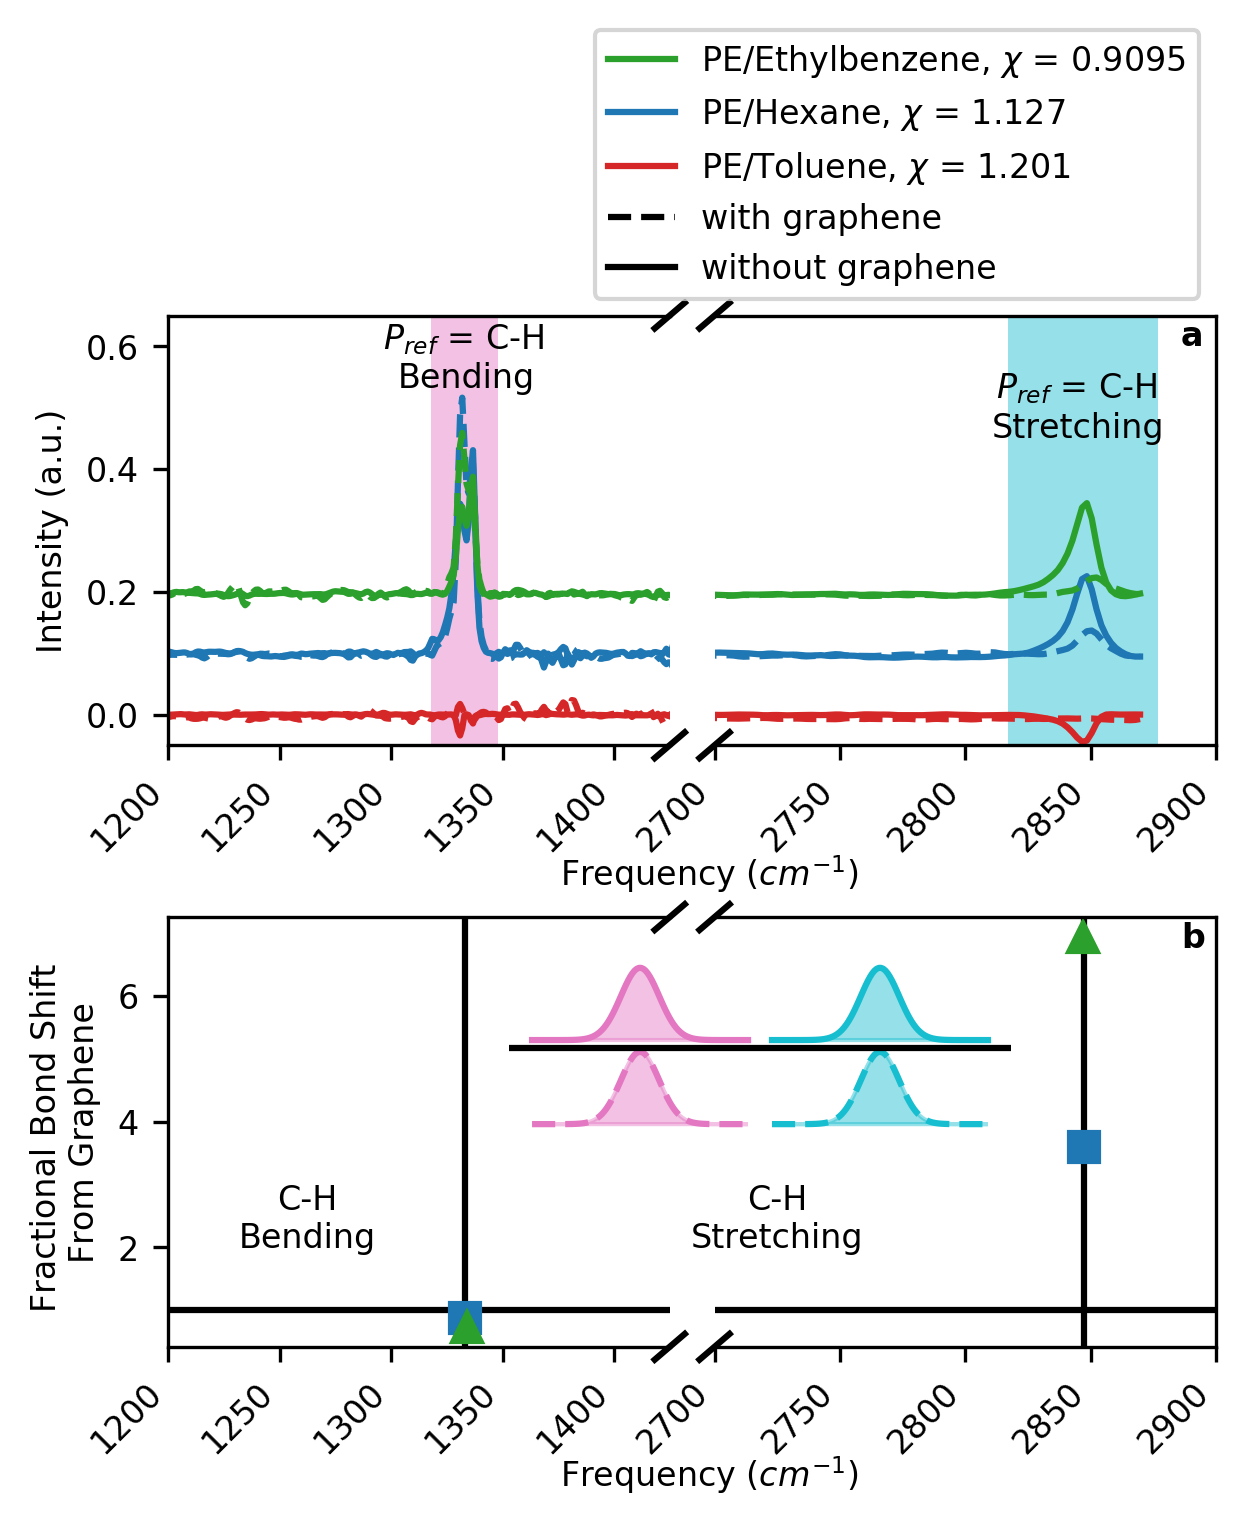

In [29]:
#Code to calculate peak area ratios between gr+polymer(peak n):gr+polymer(peak ref) via Gaussian fits of IRRAS data. 
# Plot ratios over fitted peak center frequency.

# PE
%matplotlib inline

import matplotlib.pyplot as plt; import numpy as np; import pandas as pd; from scipy.optimize import curve_fit
from scipy.signal import find_peaks; import matplotlib.lines as mlines; plt.rcParams.update({'font.size': 8});
import matplotlib.transforms as transforms; import string; import matplotlib.ticker as ticker;

def gaussS(x,a,x0,sigma):
    y=a*np.exp(-(x-x0)**2/(2*sigma**2));
    return y
def gaussM(x,*params):
    y=np.zeros_like(x); params=np.array(params);
    for i in range(0,params[0,:].size,1):
        a=params[0,i]; x0=params[1,i]; sigma=params[2,i];
        y=y+a*np.exp(-(x-x0)**2/(2*sigma**2));
    return y
def gaussArea(a,sigma):
    return a*sigma*np.pi**(0.5)

masterParams={}; fPolyParams={}; fPolyArea={}; fGrParams={}; fGrArea={};
solvents=['hexane','ethylbenzene'];

for counter,name in enumerate(solvents):
    path='C:\\Users\\acarr\\Documents\\Data\\IRRAS\\Corrected Data\\';
    irPoly=np.genfromtxt(path+'PE_'+name+'_fixed.csv',delimiter=',');
    irGr=np.genfromtxt(path+'Gr_PE_'+name+'_fixed.csv',delimiter=',');
    # Normalize data to pre-detemrined peak, consider frequency range of interest
    idx=np.where(irPoly[:,0]<1473)[0][-1]; c1=irGr[idx,1]/irPoly[idx,1];

    #plt.figure(figsize=(10,10)); plt.title('Normalized data for PE/'+name);
    #plt.plot(irPoly[:,0],c1*irPoly[:,1],label='Polymer'); plt.plot(irGr[:,0],irGr[:,1],label='Gr/Polymer'); plt.legend();
    #plt.xlabel(r'Wavenumbers $(cm^{-1})$'); plt.ylabel('Intensity (au)');

    #plt.figure(); plt.title('Selected peaks for PE/'+name);
    x=irPoly[:,0]; y=c1*irPoly[:,1];
    idx3=find_peaks(y,height=0.1,distance=30);
    #plt.plot(x,y); plt.scatter(x[idx3[0][:]],y[idx3[0][:]]); 
    #plt.xlabel(r'Wavenumbers $(cm^{-1})$'); plt.ylabel('Intensity (au)');

    amp=y[idx3[0][:]]; cen=x[idx3[0][:]]; sig=np.zeros_like(idx3[0][:])+10;
    initParams=np.vstack((amp,cen,sig));

    #plt.figure(figsize=(10,10));
    for n in range(0,initParams.shape[1]):
        p=initParams[:,n]; center=p[1]; span=30;
        spanIdx1=np.argmax(np.where(x<center-span)); spanIdx2=np.argmax(np.where(x<center+span));
        xPeak=x[spanIdx1:spanIdx2]; yPeak=y[spanIdx1:spanIdx2];
        params,cov=curve_fit(gaussS,xPeak,yPeak,p0=p);
    #    s1='Raw Data '+str(n); s2='Fitted Data '+str(n); col='C'+str(n); sz=4;
    #    plt.plot(xPeak,yPeak,color=col,marker='o',ms=sz,ls='',label=s1); 
    #    plt.plot(xPeak,gaussS(xPeak,*params),color=col,label=s2); 
    #    plt.legend(); 
        masterParams[n,name]=params[1]; fPolyArea[n,name]=gaussArea(params[0],params[2]);
    #plt.title('Fitted peaks for PE/'+name); plt.xlabel(r'Wavenumbers $(cm^{-1})$'); plt.ylabel('Intensity (au)');

    #plt.figure(); plt.xlabel(r'Wavenumbers $(cm^{-1})$'); plt.ylabel('Intensity (au)');
    x=irGr[:,0]; y=irGr[:,1];
    idx3=find_peaks(y,height=0.02,distance=30);
    #plt.plot(x,y); plt.scatter(x[idx3[0][:]],y[idx3[0][:]]); plt.title('Selected peaks for Gr/PE/'+name);
    amp=y[idx3[0][:]]; cen=x[idx3[0][:]]; sig=np.zeros_like(idx3[0][:])+10;
    initParams=np.vstack((amp,cen,sig));

    #plt.figure(figsize=(10,10));
    for n in range(0,initParams.shape[1]):
        p=initParams[:,n]; center=p[1]; span=30;
        spanIdx1=np.argmax(np.where(x<center-span)); spanIdx2=np.argmax(np.where(x<center+span));
        xPeak=x[spanIdx1:spanIdx2]; yPeak=y[spanIdx1:spanIdx2];
        params,cov=curve_fit(gaussS,xPeak,yPeak,p0=p);
     #   s1='Raw Data '+str(n); s2='Fitted Data '+str(n); col='C'+str(n); sz=4;
     #   plt.plot(xPeak,yPeak,color=col,marker='o',ms=sz,ls='',label=s1); 
     #   plt.plot(xPeak,gaussS(xPeak,*params),color=col,label=s2); 
     #   plt.legend(); 
        fGrArea[n,name]=gaussArea(params[0],params[2]);
    #plt.title('Fitted peaks for Gr/PE/'+name); plt.xlabel(r'Wavenumbers $(cm^{-1})$'); plt.ylabel('Intensity (au)');

# Generate figure with subplots. 
plt.figure(figsize=(5.5,5.5),dpi=300);
ax1a=plt.subplot2grid((2,2),(0,0),colspan=1,rowspan=1);ax1b=plt.subplot2grid((2,2),(0,1),colspan=1,rowspan=1,sharey=ax1a); 
ax2a=plt.subplot2grid((2,2),(1,0),colspan=1,rowspan=1);ax2b=plt.subplot2grid((2,2),(1,1),colspan=1,rowspan=1,sharey=ax2a); 
plt.subplots_adjust(wspace=0.55,hspace=0.4,top=0.75);

# Load axes into array for iteration later, enter reference peak numbers
solvents=['toluene','hexane','ethylbenzene'];
# Plot normalized polymer and gr+polymer IR data
space=0.1; col=['C3','C0','C2']; a=0.45; xaxisA=np.arange(1200,1700,50); xaxisB=np.arange(2700,2950,50)
linewidth=1.5; fs=8;
for n,name in enumerate(solvents):
    irPoly=np.genfromtxt(path+'PE_'+name+'_fixed.csv',delimiter=',');
    irGr=np.genfromtxt(path+'Gr_PE_'+name+'_fixed.csv',delimiter=',');
    idx=np.where(irPoly[:,0]<1473)[0][-1]; c1=irGr[idx,1]/irPoly[idx,1]; idx2=np.where(irPoly[:,0]<3000)[0][-1]; 
    # Plot data on both a and b subplots
    ax1a.plot(irPoly[:idx2,0],c1*irPoly[:idx2,1]+n*space,color=col[n],lw=linewidth); 
    ax1a.plot(irGr[:idx2,0],irGr[:idx2,1]+n*space,color=col[n],ls='--',lw=linewidth);
    ax1b.plot(irPoly[:idx2,0],c1*irPoly[:idx2,1]+n*space,color=col[n],lw=linewidth); 
    ax1b.plot(irGr[:idx2,0],irGr[:idx2,1]+n*space,color=col[n],ls='--',lw=linewidth);  

# Set a and b subplot limits to desired break limits, set labels to rotate and match
ax1a.set_xlim([xaxisA[0],xaxisA[-1]]); ax1a.set_xticklabels(xaxisA,rotation=45,ha='right');
ax1b.set_xlim([xaxisB[0],xaxisB[-1]]); ax1b.set_xticklabels(xaxisB,rotation=45,ha='right');
# Turn off extra spines and tick params
ax1a.tick_params(axis='y',right=False,labelright=False); ax1a.spines['right'].set_visible(False);
ax1b.tick_params(axis='y',left=False,labelleft=False); ax1b.spines['left'].set_visible(False);
# Set break line length and arguments for break lines
d=0.03; kwargs=dict(transform=ax1a.transAxes,color='k',clip_on=False);
# Plot break lines
ax1a.plot((1-d,1+d),(-d,+d),**kwargs); ax1a.plot((1-d,1+d),(1-d,1+d),**kwargs);
kwargs.update(transform=ax1b.transAxes,color='k',clip_on=False);
ax1b.plot((-d,+d),(1-d,1+d),**kwargs); ax1b.plot((-d,+d),(-d,+d),**kwargs);
# Adjust subplot position to account for break lines
pos=ax1a.get_position(); ax1a.set_position([pos.x0+0.07,pos.y0,pos.width,pos.height]);
pos=ax1b.get_position(); ax1b.set_position([pos.x0-0.07,pos.y0,pos.width,pos.height]);

# Draw reference peak spans, label; add axis labels, fix y limit, add legend
ax1a.axvspan(1436,1496,fc='C6',alpha=a); ax1b.axvspan(2817,2877,fc='C9',alpha=a);  
s1=r'$P_{ref}$ = C-H '; s1+='\nBending'; s2=r'$P_{ref}$ = C-H '; s2+='\nStretching';
ax1a.text(1467,0.58,s1,ha='center',va='center',transform=ax1a.transData,fontsize=fs);
ax1b.text(2845,0.5,s2,ha='center',va='center',transform=ax1b.transData,fontsize=fs);
ax1a.set_xlabel(r'Frequency $(cm^{-1})$',fontsize=fs); ax1a.xaxis.set_label_coords(1.08,-0.25);
ax1a.set_ylabel('Intensity (a.u.)',fontsize=fs); ax1a.set_ylim([-0.05,0.65]);

tol=mlines.Line2D([],[],color='C3',linestyle='-',label='PE/Toluene, $\chi$ = 1.201');
hexane=mlines.Line2D([],[],color='C0',linestyle='-',label='PE/Hexane, $\chi$ = 1.127');
ethyl=mlines.Line2D([],[],color='C2',linestyle='-',label='PE/Ethylbenzene, $\chi$ = 0.9095'); 
gr=mlines.Line2D([],[],linestyle='--',color='black',lw=linewidth,label='with graphene');
poly=mlines.Line2D([],[],linestyle='-',color='black',lw=linewidth,label='without graphene');
ax1b.legend(handles=[ethyl,hexane,tol,gr,poly],loc='lower right',bbox_to_anchor=(1,1),fontsize=fs);    

# Draw vertical lines at freq of interest
ax2a.axvline(masterParams[0,'hexane'],color='k',lw=1.5); ax2a.axhline(1,color='k',lw=1.5);
ax2a.set_xlabel(r'Frequency $(cm^{-1})$',fontsize=fs); ax2a.xaxis.set_label_coords(1.08,-0.25);
ax2b.axvline(masterParams[1,'hexane'],color='k',lw=1.5); ax2b.axhline(1,color='k',lw=1.5);

#axs=[ax1a,ax1b,ax2a,ax2b]; [ax.tick_params(axis='x',pad=10) for ax in axs];

# Initialize area ratio arrays. Choose ref peak and load peak area data w and wo gr into lists for later use
refPeak=[0,1]; numPeaks=2; areaRatioHex=[]; areaRatioEthyl=[]; freqHex=[]; freqEthyl=[];
solvents=['hexane','ethylbenzene']; col=['C6','C9'];
sol='hexane'; 
[areaRatioHex.append(fPolyArea[n,sol]/fGrArea[n,sol]) for n in refPeak];
[freqHex.append(masterParams[n,sol]) for n in refPeak];

sol='ethylbenzene';
[areaRatioEthyl.append(fPolyArea[n,sol]/fGrArea[n,sol]) for n in refPeak];
[freqEthyl.append(masterParams[n,sol]) for n in refPeak];

# Convert previously used ratio lists into arrays
areaRatioHex=np.asarray(areaRatioHex); areaRatioEthyl=np.asarray(areaRatioEthyl);
freqHex=np.asarray(freqHex); freqEthyl=np.asarray(freqEthyl);
# Plot peak area ratio ratios data with correct color and marker info
sz=7;
ax2a.plot(freqHex[:numPeaks],areaRatioHex[:numPeaks],color='C0',marker='s',ms=sz,ls='',label='PE/Hexane');
ax2b.plot(freqHex[:numPeaks],areaRatioHex[:numPeaks],color='C0',marker='s',ms=sz,ls='',label='PE/Hexane');
ax2a.plot(freqEthyl[:numPeaks],areaRatioEthyl[:numPeaks],color='C2',marker='^',ms=sz,ls='',label='PE/Ethylbenzene');
ax2b.plot(freqEthyl[:numPeaks],areaRatioEthyl[:numPeaks],color='C2',marker='^',ms=sz,ls='',label='PE/Ethylbenzene');
ax2a.set_ylabel('Fractional Bond Shift \nFrom Graphene',multialignment='center',fontsize=fs);

# Set a and b subplot limits to desired break limits, set labels to rotate and match
ax2a.set_xlim([xaxisA[0],xaxisA[-1]]); ax2a.set_xticklabels(xaxisA,rotation=45,ha='right');
ax2b.set_xlim([xaxisB[0],xaxisB[-1]]); ax2b.set_xticklabels(xaxisB,rotation=45,ha='right');
# Turn off extra spines and tick params
ax2a.tick_params(axis='y',right=False,labelright=False); ax2a.spines['right'].set_visible(False);
ax2b.tick_params(axis='y',left=False,labelleft=False); ax2b.spines['left'].set_visible(False);
# Set break line length and arguments for break lines
d=0.03; kwargs=dict(transform=ax2a.transAxes,color='k',clip_on=False);
# Plot break lines
ax2a.plot((1-d,1+d),(-d,+d),**kwargs); ax2a.plot((1-d,1+d),(1-d,1+d),**kwargs);
kwargs.update(transform=ax2b.transAxes,color='k',clip_on=False);
ax2b.plot((-d,+d),(1-d,1+d),**kwargs); ax2b.plot((-d,+d),(-d,+d),**kwargs);
# Adjust subplot position to account for break lines
pos=ax2a.get_position(); ax2a.set_position([pos.x0+0.07,pos.y0,pos.width,pos.height]);
pos=ax2b.get_position(); ax2b.set_position([pos.x0-0.07,pos.y0,pos.width,pos.height]);

# Make mini subplots for peak cartoons. Get original subplot positions and make new axes
pos=ax2a.get_position(); boxH=0.4*pos.height; boxW=pos.width; 
ax2c=plt.axes([pos.x0+0.68*pos.width,pos.y0+0.5*pos.height,boxW,boxH]);

# Plot shaded peak cartoons on mini subplots 
amp=0.43; sig=0.08; rang=0.45;
cen=0.5; xrange=np.linspace(cen-rang,cen+rang,1e2); 
ax2c.plot(xrange,gaussS(xrange,amp,cen,sig),c='C6',ls='--',lw=linewidth);
ax2c.plot(xrange,gaussS(xrange,amp,cen,sig)+0.5,c='C6',lw=linewidth); 
ax2c.fill(xrange,gaussS(xrange,amp,cen,sig),c='C6',alpha=a);
ax2c.fill(xrange,gaussS(xrange,amp,cen,sig)+0.5,c='C6',alpha=a);
cen=1.5; xrange=np.linspace(cen-rang,cen+rang,1e2); 
ax2c.plot(xrange,gaussS(xrange,amp,cen,sig),c='C9',ls='--',lw=linewidth);
ax2c.plot(xrange,gaussS(xrange,amp,cen,sig)+0.5,c='C9',lw=linewidth); 
ax2c.fill(xrange,gaussS(xrange,amp,cen,sig),c='C9',alpha=a);
ax2c.fill(xrange,gaussS(xrange,amp,cen,sig)+0.5,c='C9',alpha=a);
ax2c.axhline(0.45,c='k'); ax2c.axis('off');    

# For each subplot, label each vertical line with the correct bonding information. Make arrow to point to peak line,
# add legend
bInfoL=['C-H\nBending','C-H\nStretching'];ax2a.text(1325,2,bInfoL[0],ha='center');ax2b.text(2725,2,bInfoL[1],ha='center');

# Add subplot letter labels and fig title
axs=[ax1b,ax2b];
for n,ax in enumerate(axs):
    ax.text(0.93,0.93,string.ascii_lowercase[n],transform=ax.transAxes,size=fs,weight='bold');
plt.savefig('C:\\Users\\acarr\\Documents\\Figures\\IRRAS Paper Figures\\IRRAS_PE_cut.eps',format='eps');

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


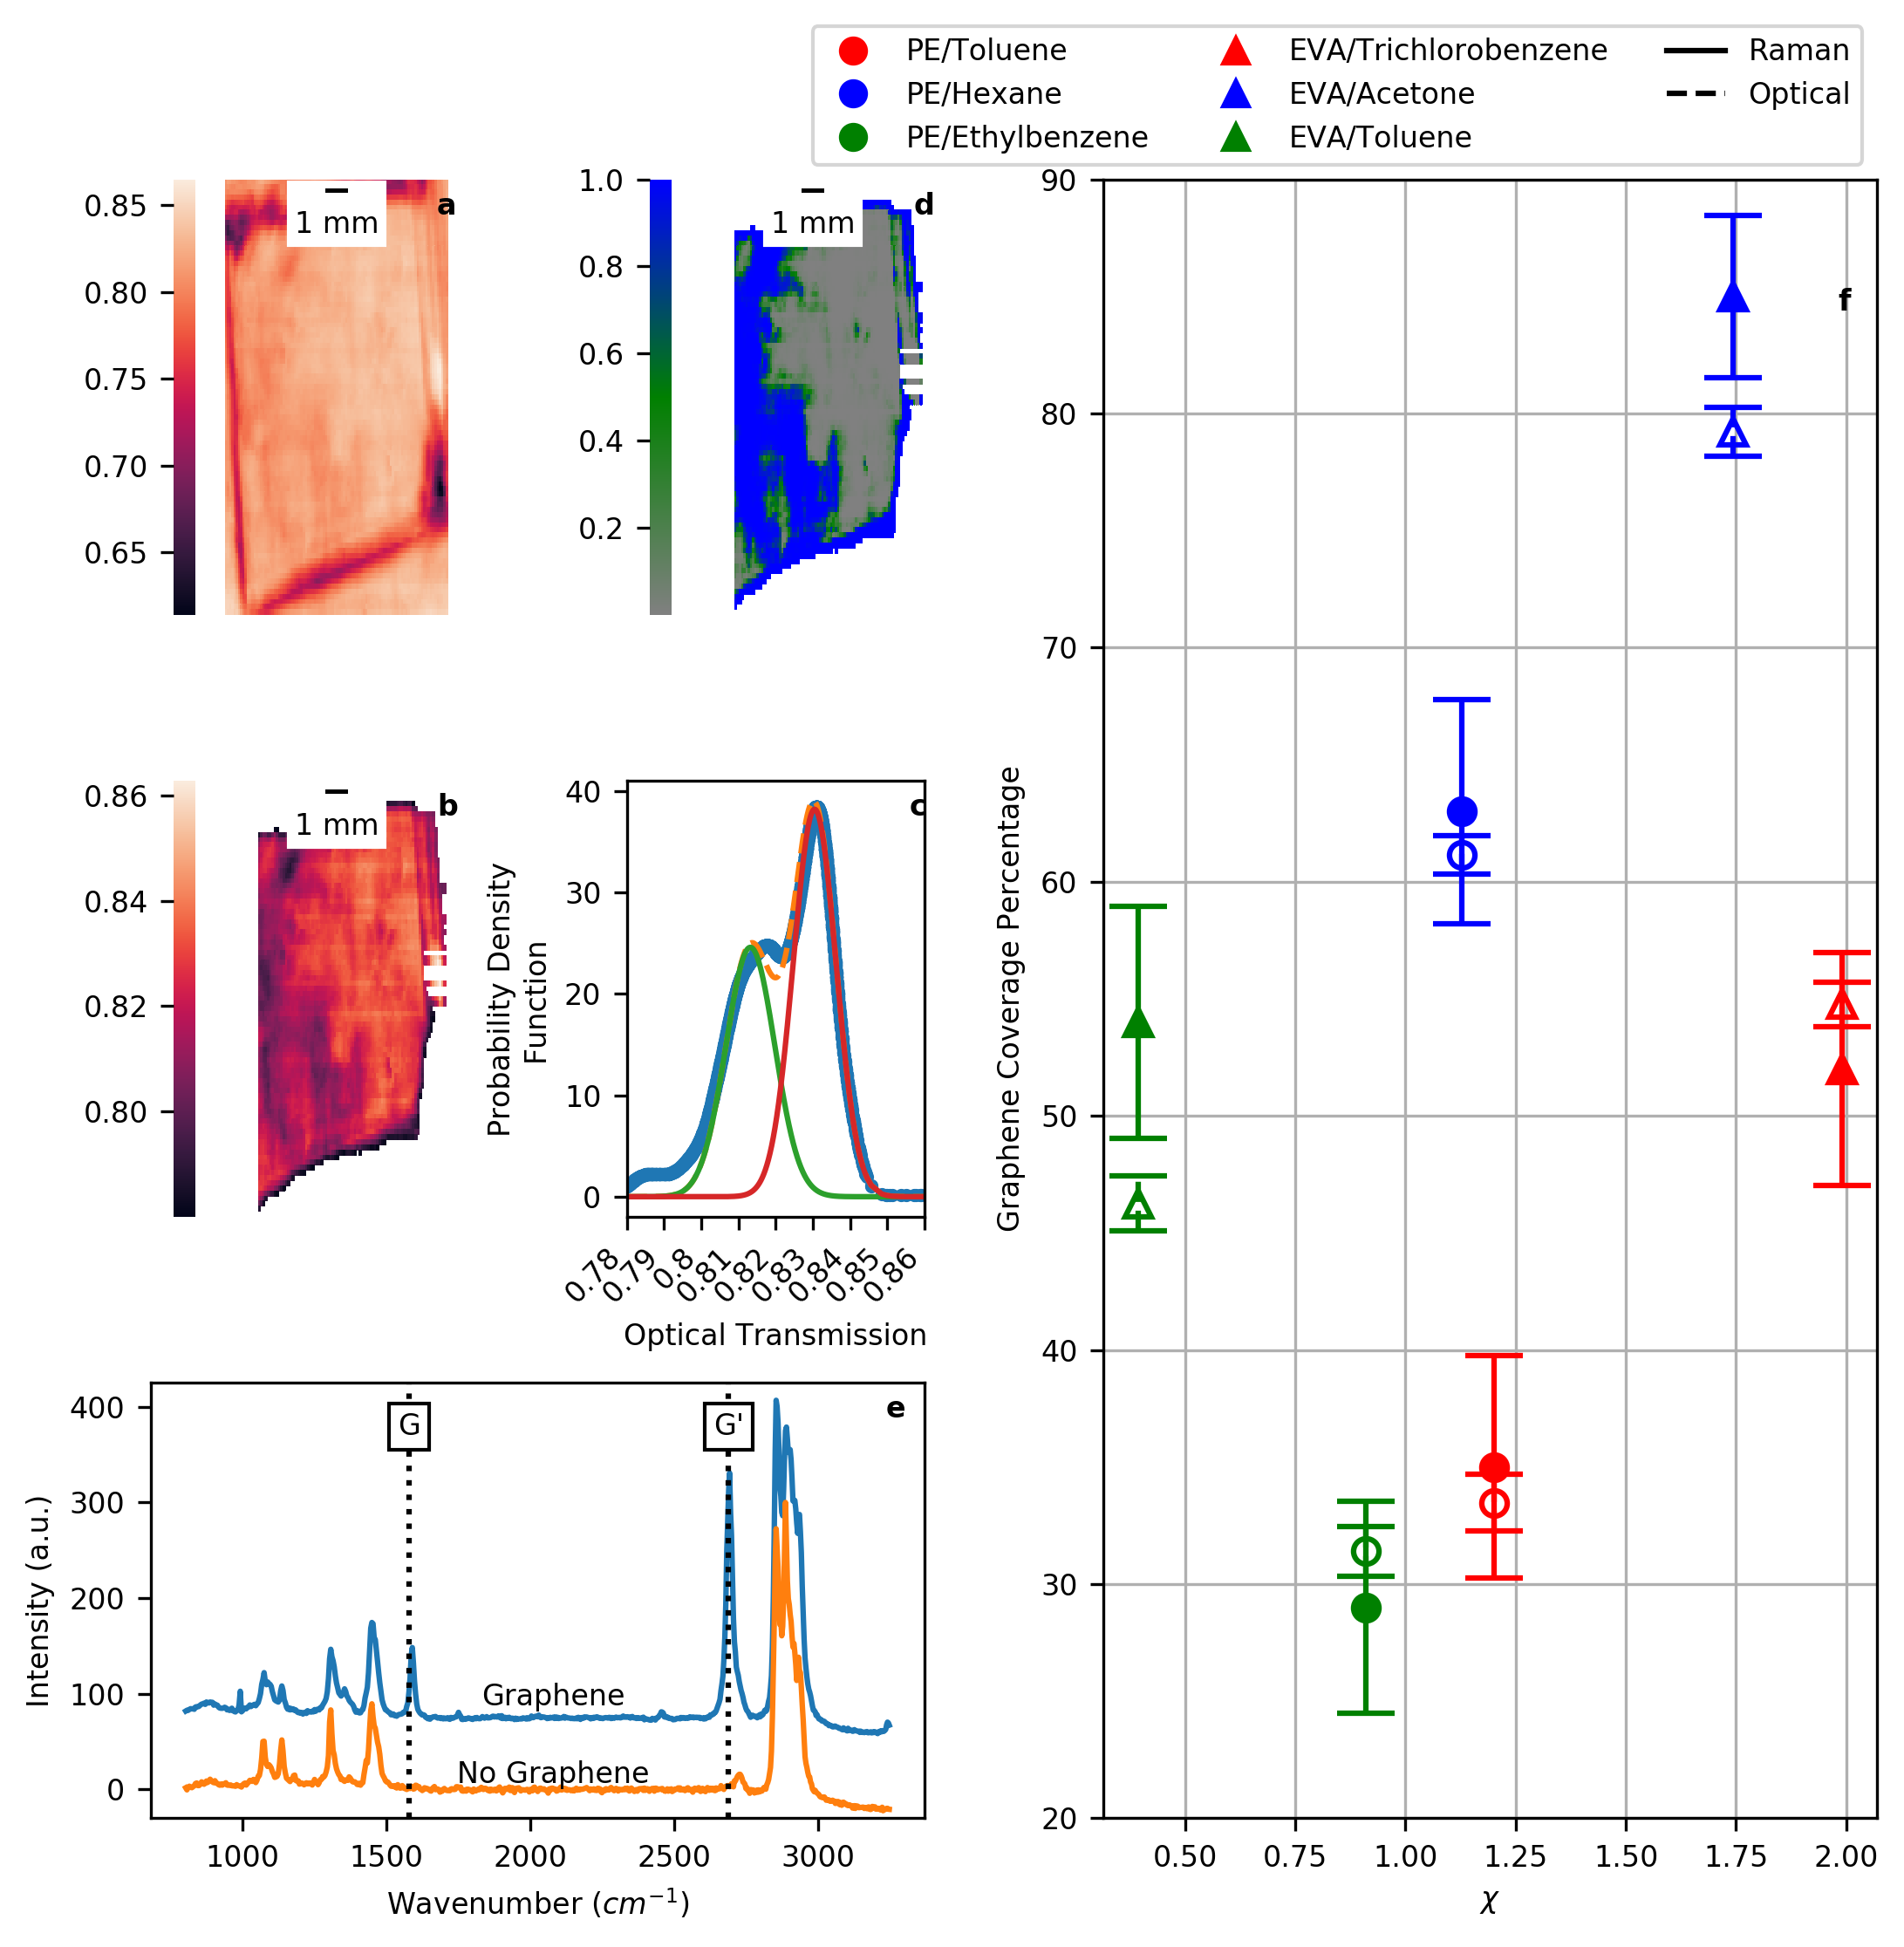

In [12]:
%matplotlib inline
%run get_heatmap.ipynb

# Schematic of graphene coverage analysis. Representative heatmap before and after non-sample removal; PDF calculation and
# data fit to Gaussian curves; discrete layer map based on fitted peak widths; representative Raman data with and without
# graphene presence; summary figure using gr coverage via Raman spot checks and optical transmission over solvent chi

#Import necessary packages
import numpy as np; import pandas as pd; import seaborn as sb; import matplotlib.pyplot as plt; import string;
plt.rcParams.update({'font.size': 8}); import matplotlib.lines as mlines;  import scipy.stats as stats;
from matplotlib.colors import LinearSegmentedColormap; import matplotlib.transforms as transforms;
from matplotlib_scalebar.scalebar import ScaleBar; from math import sqrt;

def gauss(x,*params):
    y=np.zeros_like(x);
    for i in range(0,len(params),3):
        a=params[i]; x0=params[i+1]; sigma=params[i+2];
        y=y+a*np.exp(-(x-x0)**2/(2*sigma**2));
    return y

fig=plt.figure(figsize=(7.48,7.48),dpi=300);
ax1=plt.subplot2grid((3,4),(0,0),colspan=1,rowspan=1); ax2=plt.subplot2grid((3,4),(1,0),colspan=1,rowspan=1); 
ax3=plt.subplot2grid((3,4),(1,1),colspan=1,rowspan=1); ax4=plt.subplot2grid((3,4),(0,1),colspan=1,rowspan=1); 
ax5=plt.subplot2grid((3,4),(2,0),colspan=2,rowspan=1); ax6=plt.subplot2grid((3,4),(0,2),colspan=2,rowspan=3); 

# Load representative heatmap and fitting data
path='C:\\Users\\acarr\\Documents\\Data\\Optical Transmission\\IRRAS Paper Samples\\'; samp='Gr_EVA_toluene_1';
data=pd.read_csv(path+samp+'.csv'); data['Det/Inc']=data['Detected_Power']/data['Detected_Power'].max();
r1,r2,c1,c2,thrs1,thrs2=np.genfromtxt(path+samp+'_thrsIndices.csv',delimiter=','); 
r1=int(r1); r2=int(r2); c1=int(c1); c2=int(c2);
dataArray=get_heatmap(data,0.1,'Det/Inc').values; dataArray=dataArray[r1:r2,c1:c2];
sampArray=np.genfromtxt(path+samp+'_cleanedDataArray.csv',delimiter=',');
sParams=np.genfromtxt(path+samp+'_fitParams.csv'); amp=sParams[0::3]; xCen=sParams[1::3]; sigma=sParams[2::3];
pLayArray=np.genfromtxt(path+samp+'_layerArray.csv',delimiter=',');

flatArray=sampArray[~np.isnan(sampArray)]; 
kde=stats.gaussian_kde(flatArray); kde.set_bandwidth(bw_method='silverman'); 
yGauss=kde(flatArray); xGauss=flatArray; sortIdx=np.argsort(xGauss); xGauss=xGauss[sortIdx]; yGauss=yGauss[sortIdx];

# Load representative Raman data
path='C:\\Users\\acarr\\Documents\\Data\\Raman Analysis\\'; cNorm=300; offset=75;
A=np.genfromtxt(path+'Gr_EVA_acetone_24_fixed.csv',delimiter=','); grX=A[:,0]; grY=A[:,1];
A=np.genfromtxt(path+'Gr_EVA_acetone_39_fixed.csv',delimiter=','); polyX=A[:,0]; polyY=A[:,1];

# Load Raman spot data, calculate mean and variance, based on average and standard deviation of binomial proportion
path='C:\\Users\\acarr\\Documents\\Data\\Raman Analysis\\';
samplesPE=['PE_toluene_1','PE_hexane_4','PE_ethylbenzene_3',]; rCovPE=[]; rErrPE=[];
for samp in samplesPE:
    A=np.genfromtxt(path+'Gr_'+samp[:-2]+'_spotSummary.csv',delimiter=','); 
    n=A.shape[0]; p=A.sum()/n; mu=n*p; s=sqrt(n*p*(1-p));
    # p = successful trials, n = number of trials, mu = mean, s = standard deviation
    rCovPE.append(mu); rErrPE.append(s);
    
samplesEVA=['EVA_trichlorobenzene_1','EVA_acetone_4','EVA_toluene_1']; rCovEVA=[]; rErrEVA=[];
for samp in samplesEVA:
    A=np.genfromtxt(path+'Gr_'+samp[:-2]+'_spotSummary.csv',delimiter=','); 
    n=A.shape[0]; p=A.sum()/n; mu=n*p; s=sqrt(n*p*(1-p));
    rCovEVA.append(mu); rErrEVA.append(s);

# Load optical transmission coverage data for each sample
path='C:\\Users\\acarr\\Documents\\Data\\Optical Transmission\\IRRAS Paper Samples\\';
A=np.genfromtxt(path+'PE_pGrCov.csv',delimiter=','); oCovPE=A[:,0]*100; 
oLErrPE=oCovPE-A[:,1]*100; oUErrPE=A[:,2]*100-oCovPE;
A=np.genfromtxt(path+'EVA_pGrCov.csv',delimiter=','); oCovEVA=A[:,0]*100; 
oLErrEVA=oCovEVA-A[:,1]*100; oUErrEVA=A[:,2]*100-oCovEVA;

# Plot fitted KDE data
linewidth=1.5; fs=8;
ax3.scatter(xGauss,yGauss,color='C0',s=7); ax3.plot(xGauss,gauss(xGauss,*sParams),ls='--',lw=linewidth,color='C1');
[ax3.plot(xGauss,gauss(xGauss,*np.array([amp[m],xCen[m],sigma[m]])),color='C'+str(m+2),lw=linewidth) 
 for m in range(0,len(amp))];
ax3.set_ylabel('Probability Density\nFunction',fontsize=fs); ax3.set_xlabel('Optical Transmission',fontsize=fs); 
xaxis=np.round(np.arange(xGauss[0],xGauss[-1],0.010),3); ax3.set_xlim([xaxis[0],xaxis[-1]]);
ax3.set_xticks(xaxis);ax3.set_xticklabels(xaxis,rotation=45,ha='right')
# Plot representative Raman data
idx=np.where(grX<2890)[0][-1]; c=cNorm/grY[idx]; ax5.plot(grX,c*grY+offset,lw=linewidth);
idx=np.where(polyX<2890)[0][-1]; c=cNorm/polyY[idx]; ax5.plot(polyX,c*polyY,lw=linewidth);
ax5.axvline(1580,linestyle=':',lw=linewidth,c='k'); ax5.axvline(2690,linestyle=':',lw=linewidth,c='k'); 
ax5.set_ylim([-30,425]);
ax5.set_ylabel('Intensity (a.u.)',fontsize=fs); ax5.set_xlabel(r'Wavenumber $(cm^{-1})$',fontsize=fs)
ax5.text(1580,0.9,'G',ha='center',va='center',transform=transforms.blended_transform_factory(ax5.transData,ax5.transAxes),
           bbox=dict(boxstyle='square',facecolor='white'),fontsize=fs);
ax5.text(2690,0.9,'G\'',ha='center',va='center',transform=transforms.blended_transform_factory(ax5.transData,ax5.transAxes),
           bbox=dict(boxstyle='square',facecolor='white'),fontsize=fs);
ax5.text(2080,0.08,'No Graphene',transform=transforms.blended_transform_factory(ax5.transData,ax5.transAxes),
         ha='center',fontsize=fs); 
ax5.text(2080,0.26,'Graphene',transform=transforms.blended_transform_factory(ax5.transData,ax5.transAxes),
         ha='center',fontsize=fs);

# Plot coverage data with correct error bars
# PE: toluene, hexane, ethylbenzene. EVA: trichlorobenzene, acetone, toluene
chiPE=np.asarray([1.201, 1.127, 0.9095]); chiEVA=np.asarray([1.99, 1.743, 0.3938]);
colors=['r','b','g']; sz=7; ax6.grid(True,which='both');
for n in range(0,3):
    ax6.errorbar(chiPE[n],rCovPE[n],yerr=rErrPE[n],capsize=8,capthick=1.5,ecolor=colors[n],color=colors[n],fmt='o',
                 ms=sz,mew=1.5,lw=linewidth);
    ax6.errorbar(chiEVA[n],rCovEVA[n],yerr=rErrEVA[n],capsize=8,capthick=1.5,ecolor=colors[n],color=colors[n],fmt='^',
                 ms=sz,mew=1.5,lw=linewidth);
    eb=ax6.errorbar(chiPE[n],oCovPE[n],yerr=oLErrPE[n],capsize=8,capthick=1.5,ecolor=colors[n],
                 color=colors[n],fmt='o',ms=sz,mew=1.5,fillstyle='none',lw=linewidth);
    eb[-1][0].set_linestyle('--');
    eb=ax6.errorbar(chiEVA[n],oCovEVA[n],yerr=oLErrEVA[n],capsize=8,capthick=1.5,ecolor=colors[n],
                 color=colors[n],fmt='^',ms=sz,mew=1.5,fillstyle='none',lw=linewidth);
    eb[-1][0].set_linestyle('--');

mks=7;
PEtol=mlines.Line2D([],[],color='red',marker='o',linestyle='',ms=mks,label='PE/Toluene');
PEhex=mlines.Line2D([],[],color='blue',marker='o',linestyle='',ms=mks,label='PE/Hexane');
PEethyl=mlines.Line2D([],[],color='green',marker='o',linestyle='',ms=mks,label='PE/Ethylbenzene');

EVAtrichloro=mlines.Line2D([],[],color='red',marker='^',linestyle='',ms=mks,label='EVA/Trichlorobenzene');
EVAacetone=mlines.Line2D([],[],color='blue',marker='^',linestyle='',ms=mks,label='EVA/Acetone');
EVAtol=mlines.Line2D([],[],color='green',marker='^',linestyle='',ms=mks,label='EVA/Toluene');

r=mlines.Line2D([],[],color='k',marker='',linestyle='-',lw=linewidth,label='Raman');
o=mlines.Line2D([],[],color='k',marker='',linestyle='--',lw=linewidth,label='Optical');

ax6.legend(handles=[PEtol,PEhex,PEethyl,EVAtrichloro,EVAacetone,EVAtol,r,o],
           ncol=3,loc='lower right',bbox_to_anchor=(1,1));
ax6.set_ylim([20,90]); ax6.set_xlabel(r'$\chi$',fontsize=fs); ax6.set_ylabel('Graphene Coverage Percentage',fontsize=fs);
ax1.axis('off'); ax2.axis('off'); ax4.axis('off'); fig.tight_layout(); fig.subplots_adjust(left=0.1,wspace=0.6);

# Plot heatmaps and move colorbars, must be done after tight subplot
sb.heatmap(dataArray,ax=ax1,cbar_kws=dict(use_gridspec=False,location='left'));
sb.heatmap(sampArray,ax=ax2,cbar_kws=dict(use_gridspec=False,location='left'));
cmap=LinearSegmentedColormap.from_list("", ["gray","green","blue"]);
sb.heatmap(pLayArray,cmap=cmap,ax=ax4,cbar_kws=dict(use_gridspec=False,location='left')); 

# Add scalebars to heatmaps
axs=[ax1,ax2,ax4];
[ax.add_artist(ScaleBar(100,units='um',location='upper center')) for ax in axs];

axs=[ax1,ax2,ax3,ax4,ax5,ax6];
[ax.text(0.95,0.92,string.ascii_lowercase[n],transform=ax.transAxes,size=fs,weight='bold') for n,ax in enumerate(axs)];

#fig.savefig('C:\\Users\\acarr\\Documents\\Figures\\IRRAS Paper Figures\\RamanOptChi.eps',format='eps');

EVA_toluene_1 delta T = 0.017269412197303158
EVA_acetone_4 delta T = 0.020716387813865866
EVA_trichlorobenzene_1 delta T = 0.020774036953343678
PE_ethylbenzene_3 delta T = 0.033883729761084114
PE_toluene_1 delta T = 0.025165659050660594
PE_hexane_4 delta T = 0.027411479002840133


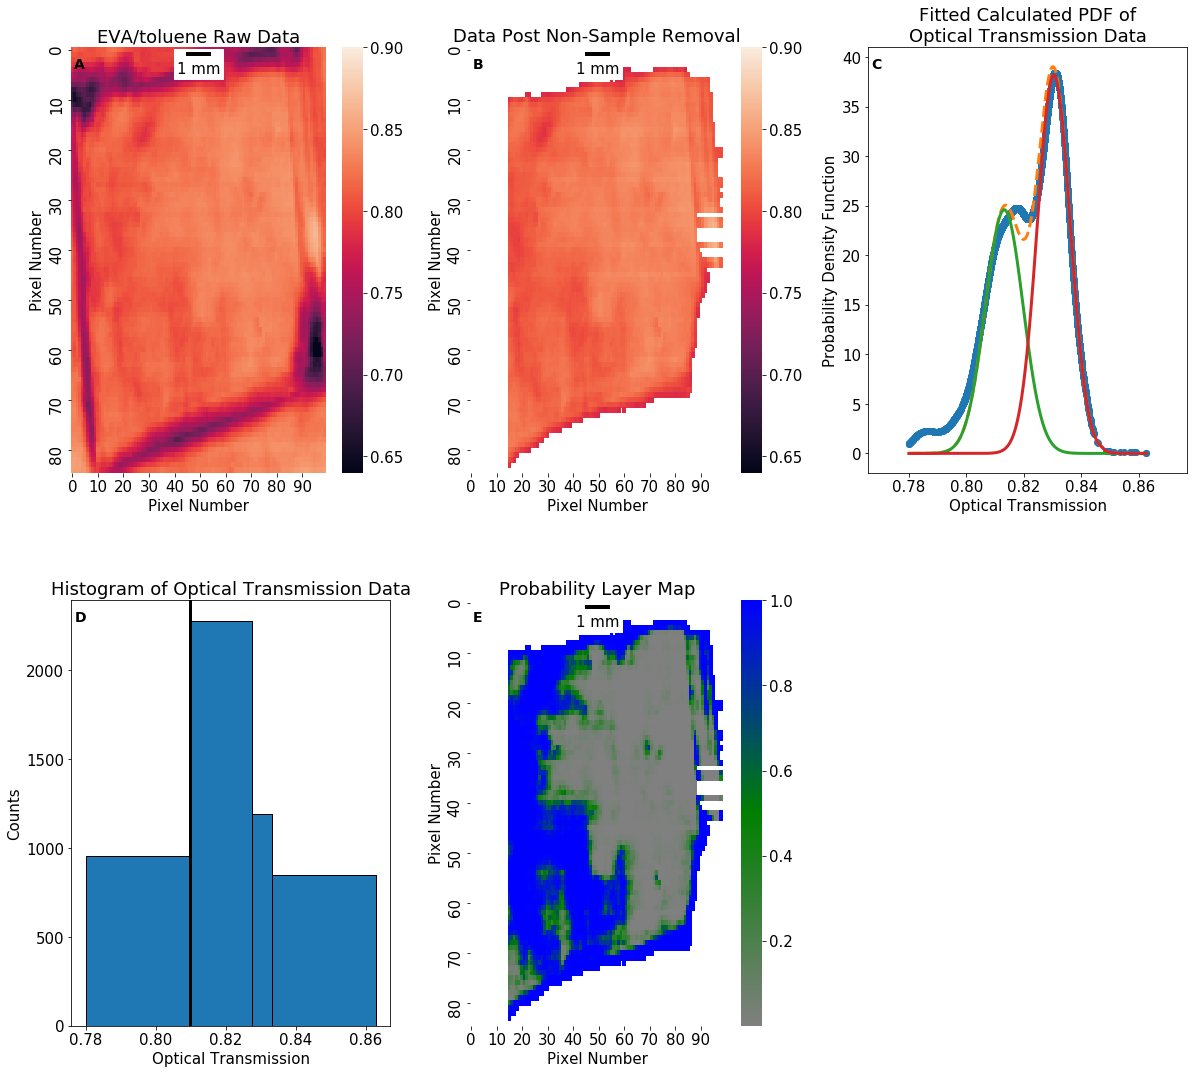

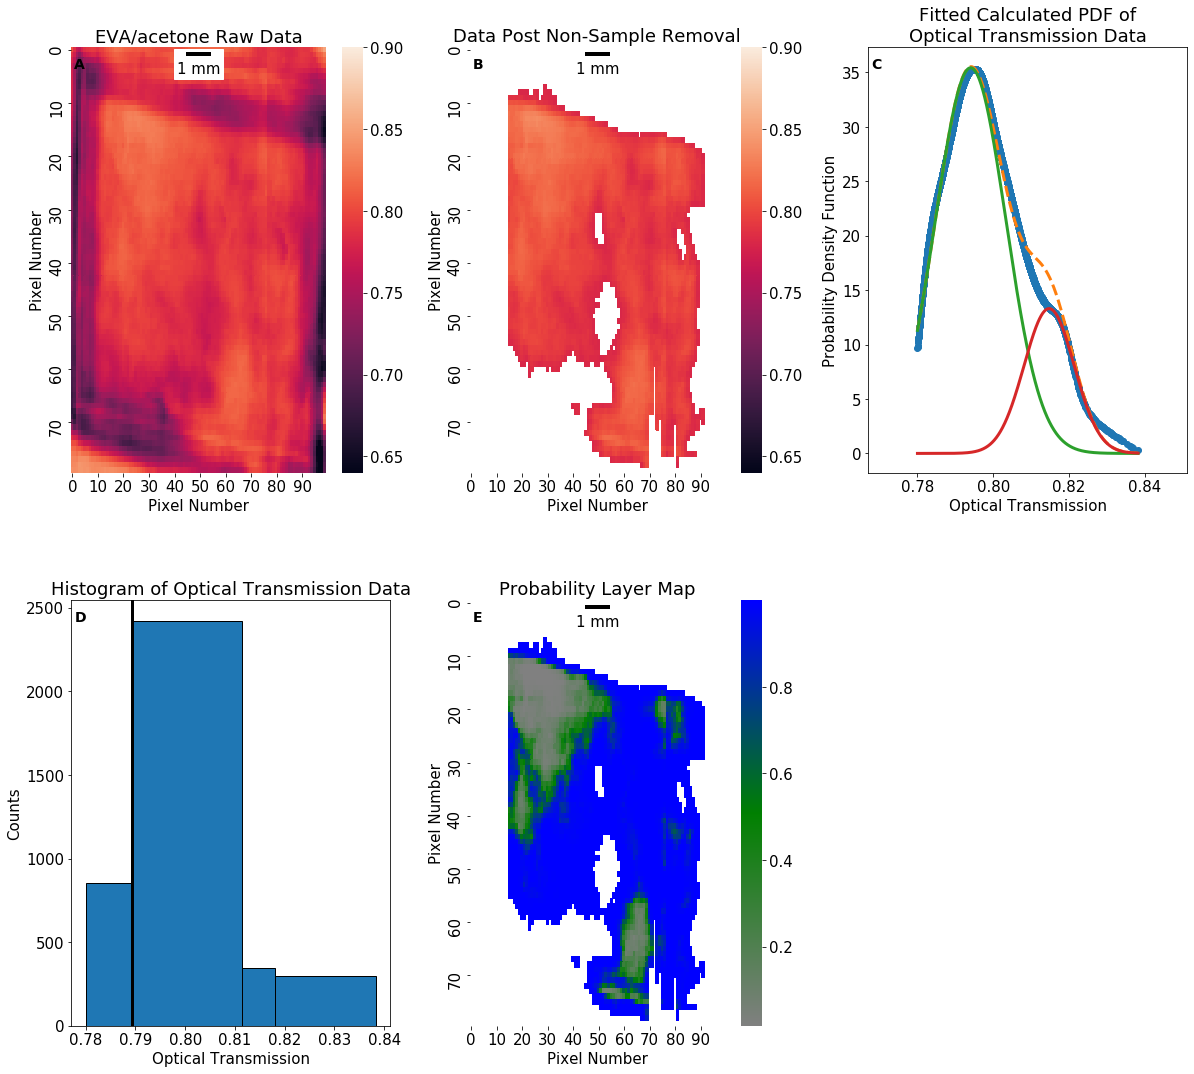

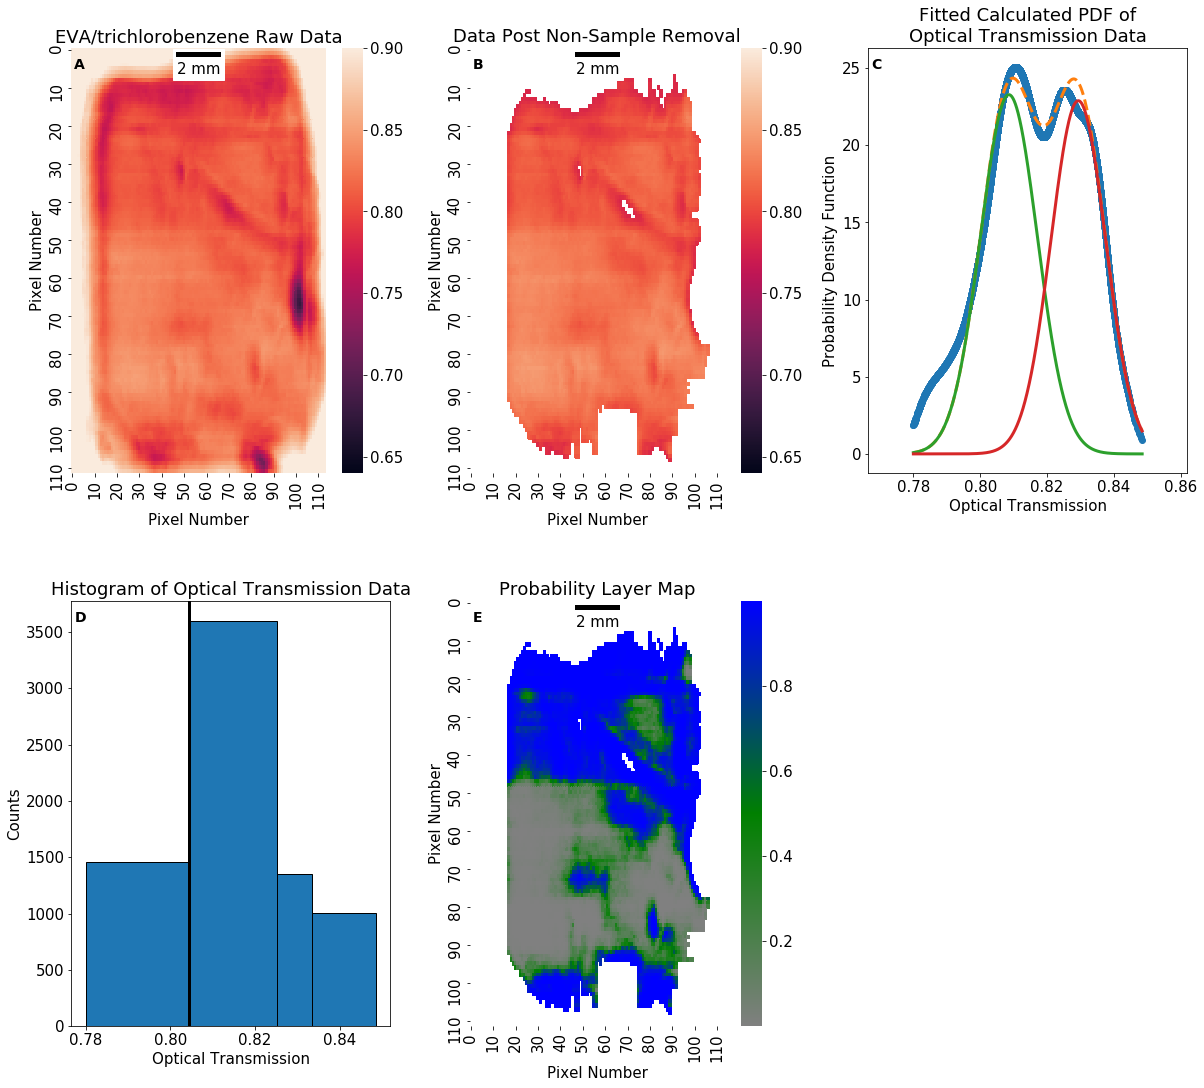

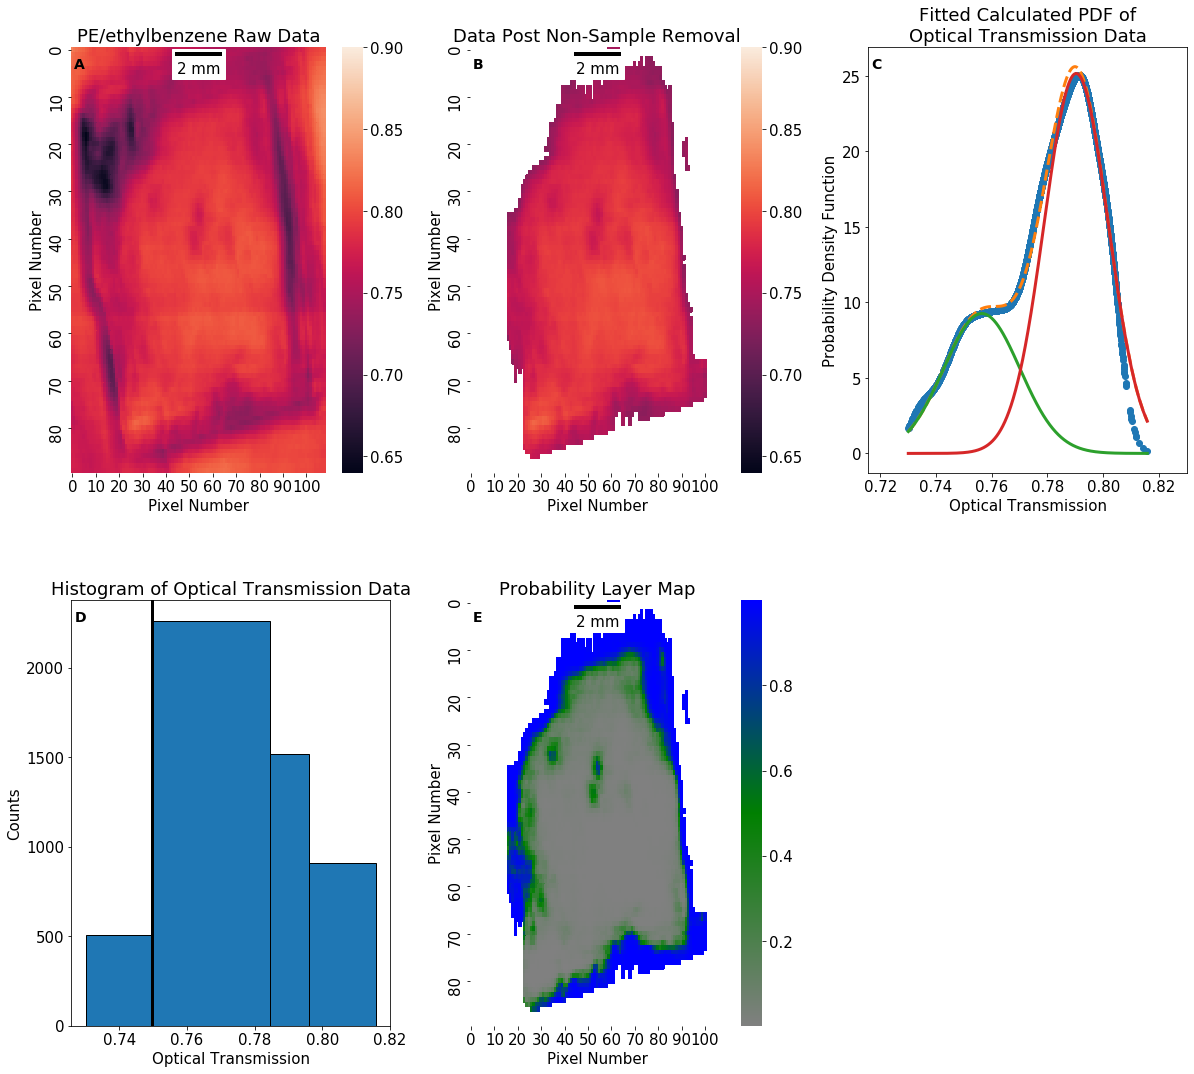

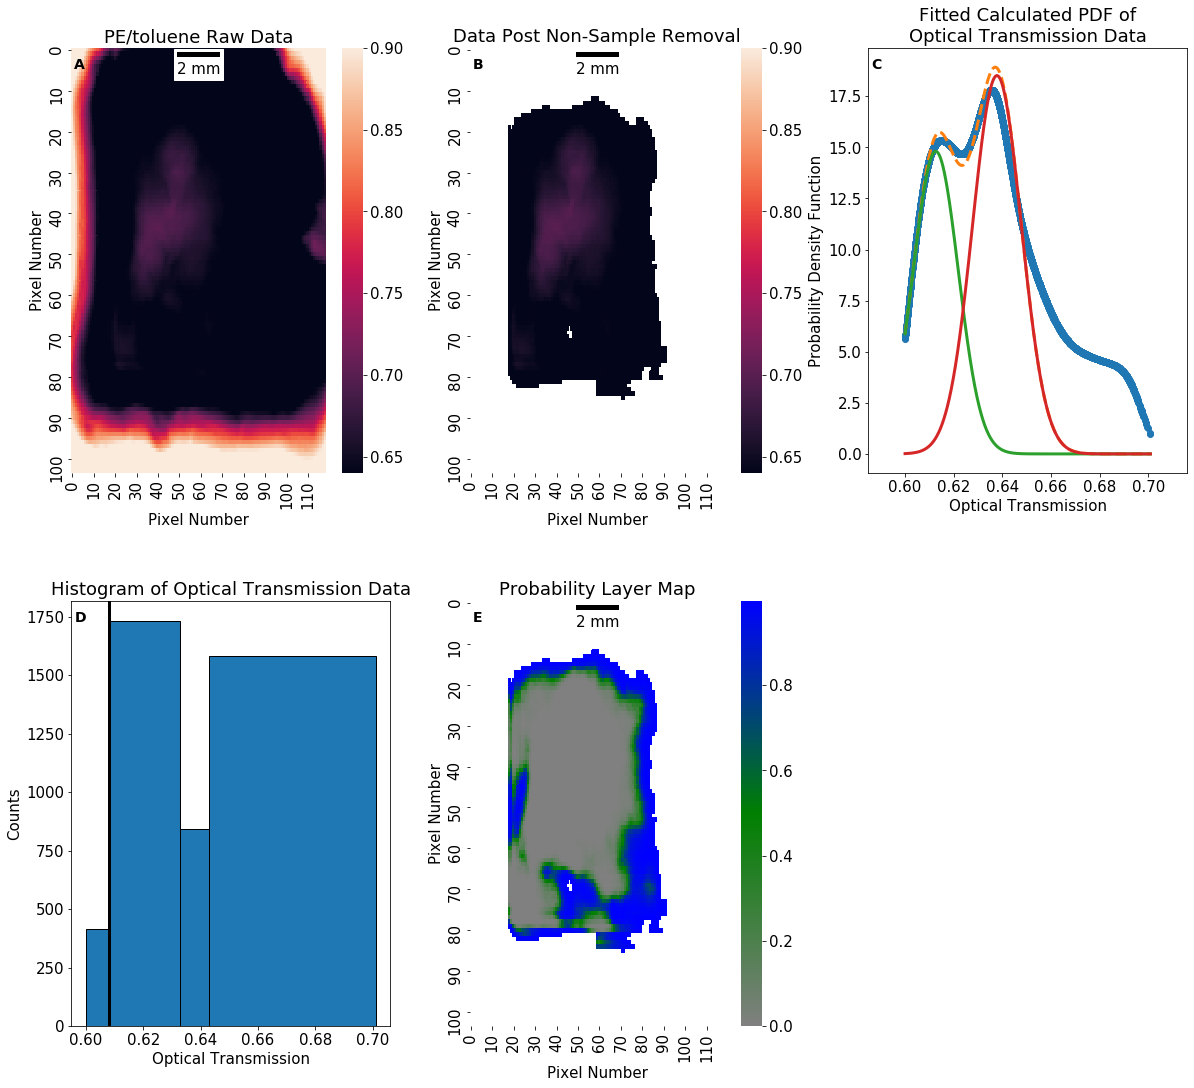

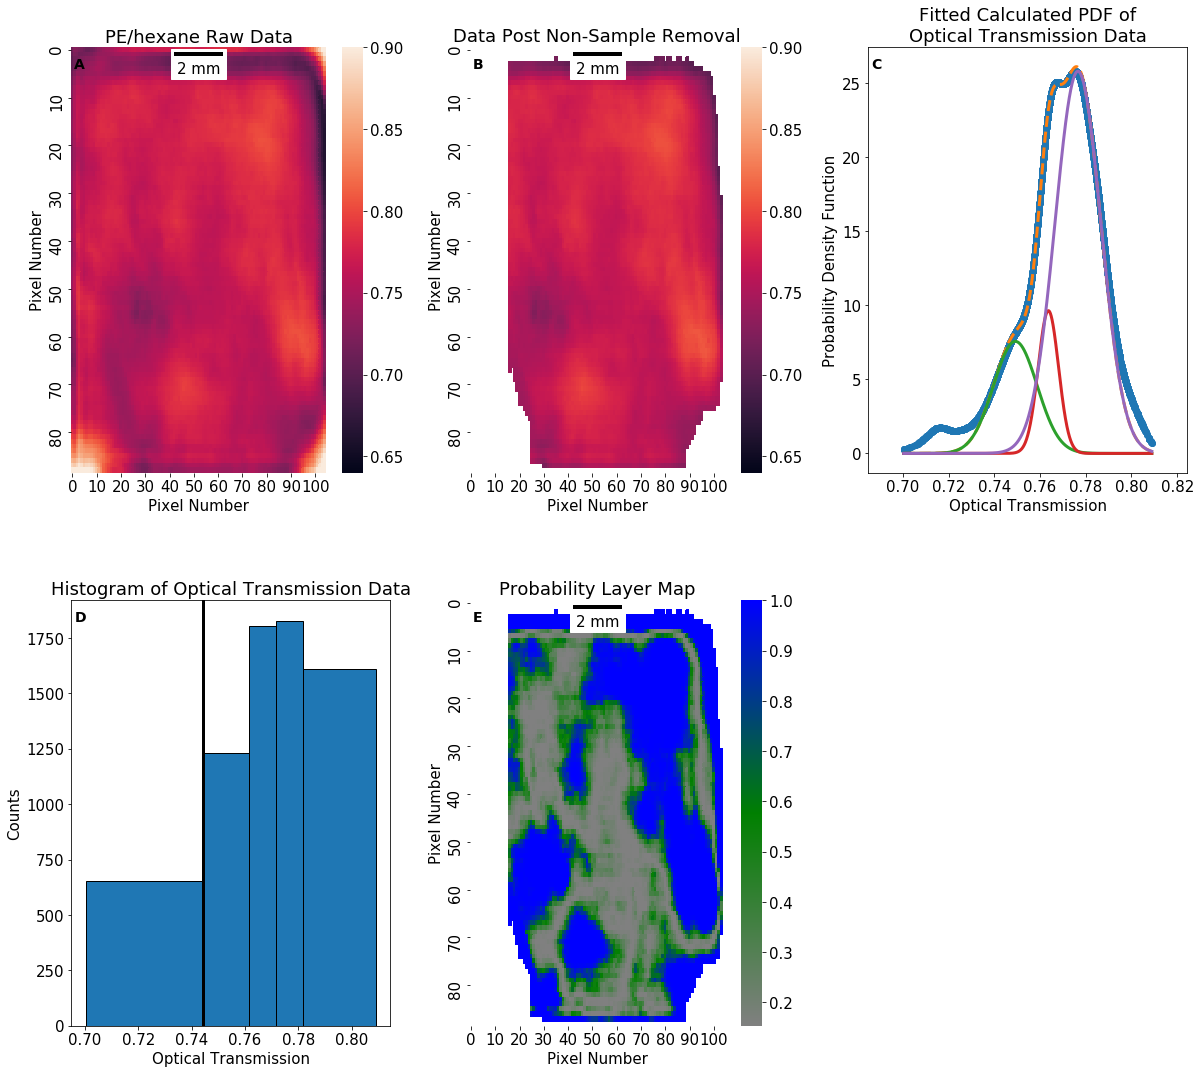

In [1]:
%matplotlib inline
%run get_heatmap.ipynb

# Figure demonstrating optical transmission data analysis for each sample

#Import necessary packages
import numpy as np; import string; import matplotlib.pyplot as plt; plt.rcParams.update({'font.size': 15}); import re;
import matplotlib.transforms as transforms; import scipy.stats as stats;from matplotlib_scalebar.scalebar import ScaleBar;
import pandas as pd; import seaborn as sb; from matplotlib.colors import LinearSegmentedColormap; 
import scipy.stats as stats

def gauss(x,*params):
    y=np.zeros_like(x);
    for i in range(0,len(params),3):
        a=params[i]; x0=params[i+1]; sigma=params[i+2];
        y=y+a*np.exp(-(x-x0)**2/(2*sigma**2));
    return y

path='C:\\Users\\acarr\\Documents\\Data\\Optical Transmission\\IRRAS Paper Samples\\'; yt=10; xt=10;
samples=['EVA_toluene_1','EVA_acetone_4','EVA_trichlorobenzene_1','PE_ethylbenzene_3','PE_toluene_1','PE_hexane_4'];
for samp in samples:
    plt.figure(figsize=(20,18)); sz=14;
    A=np.genfromtxt(path+'Gr_'+samp+'_thrsIndices.csv',delimiter=','); 
    r1=int(A[0]); r2=int(A[1]); c1=int(A[2]); c2=int(A[3]); thrs=A[4];
    data=pd.read_csv(path+'Gr_'+samp+'.csv',delimiter=',');
    data['Det/Inc']=data['Detected_Power']/data['Detected_Power'].max(); dataArray=get_heatmap(data,0.1,'Det/Inc').values; 
    ax=plt.subplot(2,3,1); sb.heatmap(dataArray[r1:r2,c1:c2],ax=ax,vmin=0.64,vmax=0.90,yticklabels=yt,xticklabels=xt); 
    ax.set_title(re.sub('_','/',samp[:-2])+' Raw Data'); ax.set_ylabel('Pixel Number'); ax.set_xlabel('Pixel Number');
    ax.add_artist(ScaleBar(100,units='um',location='upper center'));
    ax.text(0.01,0.95,string.ascii_uppercase[0],transform=ax.transAxes,size=sz,weight='bold')
    
    sampArray=np.genfromtxt(path+'Gr_'+samp+'_cleanedDataArray.csv',delimiter=',');
    ax=plt.subplot(2,3,2); sb.heatmap(sampArray,ax=ax,vmin=0.64,vmax=0.90,yticklabels=yt,xticklabels=xt); 
    ax.set_title('Data Post Non-Sample Removal'); ax.set_ylabel('Pixel Number'); ax.set_xlabel('Pixel Number');
    ax.add_artist(ScaleBar(100,units='um',location='upper center'));
    ax.text(0.01,0.95,string.ascii_uppercase[1],transform=ax.transAxes,size=sz,weight='bold')
    
    sParams=np.genfromtxt(path+'Gr_'+samp+'_fitParams.csv'); amp=sParams[0::3]; xCen=sParams[1::3]; sigma=sParams[2::3];
    xGauss=sampArray[~np.isnan(sampArray)]; 
    kde=stats.gaussian_kde(xGauss); kde.set_bandwidth(bw_method='silverman'); yGauss=kde(xGauss);
    sortIdx=np.argsort(xGauss); xGauss=xGauss[sortIdx]; yGauss=yGauss[sortIdx];
    ax=plt.subplot(2,3,3);
    ax.scatter(xGauss,yGauss,color='C0'); ax.plot(xGauss,gauss(xGauss,*sParams),ls='--',lw=3,color='C1');
    [ax.plot(xGauss,gauss(xGauss,*np.array([amp[m],xCen[m],sigma[m]])),color='C'+str(m+2),lw=3) for m in range(0,len(amp))];
    ax.set_ylabel('Probability Density Function'); ax.set_xlabel('Optical Transmission'); 
    ax.set_title('Fitted Calculated PDF of\nOptical Transmission Data');
    ax.text(0.01,0.95,string.ascii_uppercase[2],transform=ax.transAxes,size=sz,weight='bold');

    bins=[0]*(len(amp)+3); bins[0]=xGauss[0]; bins[-1]=xGauss[-1]; bins[-2]=xCen[-1]+sigma[-1]/2; areaDict={};
    for m in range(0,len(amp)):
        bins[m+1]=xCen[m]-sigma[m]/2;
    ax=plt.subplot(2,3,4);
    binCounts,_,_=ax.hist(xGauss,bins=bins,edgecolor='k'); 
    ax.set_ylabel('Counts'); ax.set_xlabel('Optical Transmission'); ax.set_title('Histogram of Optical Transmission Data');
    ax.axvline(bins[1],color='k',lw=3);
    ax.text(0.01,0.95,string.ascii_uppercase[3],transform=ax.transAxes,size=sz,weight='bold');

    ax=plt.subplot(2,3,5);
    pLayArray=np.genfromtxt(path+'Gr_'+samp+'_layerArray.csv',delimiter=',');
    cmap=LinearSegmentedColormap.from_list("", ["gray","green","blue"]);
    sb.heatmap(pLayArray,cmap=cmap,ax=ax,yticklabels=yt,xticklabels=xt); 
    ax.set_title('Probability Layer Map'); ax.set_ylabel('Pixel Number'); ax.set_xlabel('Pixel Number');
    ax.add_artist(ScaleBar(100,units='um',location='upper center'));
    ax.text(0.01,0.95,string.ascii_uppercase[4],transform=ax.transAxes,size=sz,weight='bold');
    
    plt.subplots_adjust(wspace=0.25,hspace=0.3); 
    filename='C:\\Users\\acarr\\Documents\\Figures\\IRRAS Paper Figures\\optTrans_'+samp;
    #plt.savefig(filename+'.eps',format='eps'); 
    #plt.savefig(filename+'.png',format='png',dpi=150);
    
    print(samp+' delta T = '+str(xCen[-1]-xCen[0]))

In [ ]:
%matplotlib inline
import numpy as np; import matplotlib.pyplot as plt; import re; import matplotlib.image as mpimg;

# Figure plotting AFM data of polymer samples for SI
plt.figure(figsize=(22,12));
path='C:\\Users\\acarr.BNL\\Documents\\Data\\AFM\\2019_03_22\\';
samples=['EVA_acetone','EVA_toluene','EVA_trichlorobenzene','PE_ethylbenzene','PE_hexane','PE_toluene'];
for n,samp in enumerate(samples,1):
    img=mpimg.imread(path+samp+'.png');
    ax=plt.subplot(2,3,n); ax.imshow(img,aspect='auto'); ax.axis('off'); ax.set_title(re.sub('_','/',samp));
    
plt.subplots_adjust(hspace=0.08,wspace=0); 
plt.savefig('C:\\Users\\acarr.BNL\\Documents\\Figures\\IRRAS Paper Figures\\AFM_polymers_supp.eps',format='eps');

In [ ]:
# Code to plot optical transmission heatmaps for journal cover

%matplotlib inline
%run get_heatmap.ipynb

#Import necessary packages
import numpy as np; import pandas as pd; import seaborn as sb; import matplotlib.pyplot as plt; 

# Import data. Get heatmap
path='/Users/ajcjake/Desktop/IRRAS Paper Samples/'; 
samps=['Gr_EVA_trichlorobenzene','Gr_EVA_toluene','Gr_EVA_acetone','Gr_PE_toluene','Gr_PE_hexane',
       'Gr_PE_ethylbenzene'];
for samp in samps:
    dataArray=pd.read_csv(path+samp+'_cleanedDataArray.csv',sep=',');

    fig,ax1=plt.subplots(figsize=(6,6));
    sb.heatmap(dataArray,ax=ax1,cmap='Spectral_r',cbar_kws={"ticks":[]}); ax1.set_xticks([]); ax1.set_yticks([]);
    plt.savefig(path+samp,dpi=300,format='svg');